# <center><font color=Purple>FRAUDE FISCALE</font></center>

<font><b>Synopsis :</b></font><br>
Le dataset étudié ici présente des descriptions de contribuables et une valeur en `float` de la target.<br>
La description d'une variable `CTR_OBLFOP` "Obligations Foprolos" indique qu'il s'agit d'un jeu de données sur les contribuables tunisiens puisqu'il s'agit du Fonds de Promotion de Logements Sociaux qui est un système tunisien.
![fiscalTunisie](Figures/fiscalTunisie.png)

### Problématique métier
Dans un contexte de fraude aux impôts, les objectifs peuvent être :
- 1) Détécter qui est fraudeur et qui ne l'est pas
- 2) Tenter de déterminer si on peut prédire le taux de fraude suivant certaines caractéristiques à déterminer au cours de l'étude
- 3) Segmentation des profils de fraudeurs (Exemple Fraudeur de bonne foi)

### Traduction en problmatique Machine Learning
- 1) Classification
- 2) Régressions selon scenarii
- 3) Clustering

### Objectif :
L'ensemble des analyses de ces études nous permettront enfin d'émettres des hypothèses dans le but de proposer des actions concrètes pour réduire la fraude à l'impôt tunisien

**N.B** : Tous ces objectifs, ne seront pas réalisables dans cette étude pour des raison de délais (5 jours).
Nous commencerons par la classification et dans l'hypothèse peu probable que nous ayons terminé nous poursuivrons sur les autres démarches évoquées

Sommaire : 
- [1 : Importer les données](#1)
- [2 : Comprendre les données](#2)
- - [2-1 : Analyse du fond](#2-2)
- - - [2-2-1 : Visualisation de la target](#2-2-1)
- - - [2-2-2 : Compréhension des variables](#2-2-2)
- - - - [2-2-2-1 : Création de groupes de features](#recueil)
- - - [2-2-3 : Corrélations features - target](#2-2-3)
- - - [2-2-4 : Valeurs aberrantes](#2-2-4)
- - - [2-2-5 : Valeurs atypiques](#2-2-5)
- [3 : Visualiser les données](#3)
- [4 : Nettoyer les données](#4)
- [5 : Equilibrer les données](#5)
- [6 : Identifier la problématique (classification)](#6)
- [7 : Appliquer des modèles](#7)
- [8 : Trouver le modèle plus pertinent](#8)
- - [8-1 : Train_test_split](#8-1)
- - [8-2 : Validation Set](#8-2)
- - [8-3 : Cross Validation](#8-3)
- - [8-4 : Validation Curve](#8-4)
- - [8-5 : GridSearchCV](#8-5)
- - [8-6 : Learning Curve](#8-6)
- [9 : Analyser le résultat](#9)


# Rapport
**Target**|**Colonnes**|**Lignes**|**Floats**|**Integers**|**Objects**
--|--|--|--|--|--
`target`|121|25053|103|16|2
|||||`id`
|||||`CTR_CATEGO_X`

- **Variable target** : `target`
- **Lignes et colonnes** : 25 053 x 121<br>
### [Analyse de forme](#1)
- **Types de variables** : 
  - float64(103), 
  - int64(16), 
  - object(2 `id` & `CTR_CATEGO_X`)
- **Analyse des valeurs manquantes** : 
  - <font size=3>**75%**</font> des features avec moins de <font size=3>**1%**</font> de NaN
  - le reste des features est à plus de <font size=3>**70%**</font> de NaNs
  - **Mais** même à <font size=3>**94%**</font> de NaNs, cela représente quand même presque <font size=3 color="red"><b>1500</b> valeurs.</font>
- La target présente <font size=3>**2 parties** distinctes.</font>
 - Une partie de valeurs à **0** qui représente un quart des valeurs.
 - Une autre partie des valeurs sont réparties selon une distribution normale.
   - **Centrée** sur une valeur de <font size=3>**15**</font>
   - **Amplitude** d'environ <font size=3>**+/-5**</font>

![Target](./Figures/Target.png)

### Analyse de fond
- **Visualisation de la target :**
- **Signification de la variable target :** Par déductions et intuition on peut dégager une hypothèse.
  - Les **0** représentent les personnes morales qui ne doivent rien au FISC -> **Groupe 0 = Non-fraudeurs**
  - Les **"fraudeurs"** sont désignés par la target selon, par hypothèse :
    - un pourcentage 
    - ou une valeur 
    - ou encore un score qui désignerait la quantité de valeurs qu'ils auraient dû payer aux impôts. 
      - Ma thèse la plus crédible serait un pourcentage. (Entre **5 et 25% d'impayé**). -> **Groupe 1 = Fraudeurs**
      
      ==> <font size=3>**Action :**</font>
      - Création d'une nouvelle colonne `GROUP` ayant pour valeur 
            - 0 (non-fraudeur)
            - 1 (fraudeur)

Remarquons que si on retient cette hypothèse :
- on suggère qu'il y a <font size=3>**3 fois plus de fraudeurs**</font> que de non fraudeurs ce qui est déstabilisant. <br>
 
Répartition de la target : (selon hypothèse)
- 75% Fraudeurs 
- 25% Non fraudeurs

Une étude métier pourrait éclaircir ce point.<br><br>
*Peut-être qu'il est très difficile de comprendre le système fiscal et que les fraudeurs sont constitués de fraudeurs de bonne foi et d'autres font exprès de frauder.* <br>
*Retenons cette idée pour une éventuelle extension de l'étude sur les fraudeurs* <br>
<center><b>hypothèse de la constitution des fraudeurs :</b></center>
<center>- <b>fraudeurs de bonne foi</b></center>
<center>- <b>fraudeurs intentionnels</b></center> 

Le dataset possède beaucoup de valeurs manquantes pour certaines colonnes (fin du tableau)
- En noir les valeurs présentes
- En clair les valeurs manquantes
![panoramique des nans](Figures/pano_nans.png)

L'étude montre que la plupart des colonnes sont bien remplies.
- Les colonnes les mieux remplies fournissent 75% volume de données
![remplissage](Figures/remplissage.png)

<font size=3>**10 groupes de features**</font> ont pu être distinguées pour tester des stratégies d'entrainement des modèles <br>
 - <font color='#088A4B'>**columns_codes** : codes et année d'exercices (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations_0** : Obligations (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations** : Obligations</font>
 - <font color='#088A4B'>**columns_TVA** : Toutes les TVA</font>
 - <font color='#088A4B'>**columns_revenus** : Les différents revenus</font>
 - <font color='#088A4B'>**columns_ordonnance** : </font>
 - <font color='#088A4B'>**columns_autres_regimes** :</font>
 - <font color='#088A4B'>**columns_facture_suspension** : Les factures en suspension</font>
 - <font color='#088A4B'>**column_facture_F** : Les factures de type F, F est une données inconnue</font>
 - <font color='#088A4B'>**columns_exportation** :</font>

## <a id='1'><center><font color="INDIANRED">1) Importer les données</font></center></a>

In [199]:
import pandas as pd
import python_personal_library as ppl

In [200]:
list_dir = ppl.get_datasets("Datasets")

In [201]:
list_dir

['.~lock.VariableDescription.csv#',
 'test.csv',
 'train.csv',
 'VariableDescription.csv']

In [202]:
df_train_initial = pd.read_csv("./Datasets/train.csv")
df_VariableDescription_initial = pd.read_csv("./Datasets/VariableDescription.csv")

In [203]:
from python_personal_library import exhaustiveDescribe
exhaustiveDescribe(df_train_initial)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 23.1+ MB


Shape 
 
 
 
 
 Lines 
 25053 
 
 
 Columns 
 121 
 
 
 
 
 
 
 BCT_CODBUR 
 CTR_MATFIS 
 CTR_CATEGO_X 
 FJU_CODFJU 
 CTR_CESSAT 
 ACT_CODACT 
 CTR_OBLDIR 
 CTR_OBLACP 
 CTR_OBLRES 
 CTR_OBLFOP 
 CTR_OBLTFP 
 CTR_OBLDCO 
 CTR_OBLTVA 
 CTR_OFODEC 
 CTR_OFODEP 
 CTR_OFODET 
 CTR_OBLAUT 
 CTR_OBLASS 
 CTR_ODTIMB 
 CTR_OBLTCL 
 CTR_OBLTHO 
 CTR_OBLDLI 
 CTR_OBLTVI 
 CTR_RATISS 
 EXE_EXERCI 
 TVA_CHAFF6 
 TVA_CHAFF7 
 TVA_CHAF10 
 TVA_CHAF12 
 TVA_CAF125 
 TVA_CHAF15 
 TVA_CHAF18 
 TVA_CHAF22 
 TVA_CHAF29 
 TVA_CHAF36 
 TVA_TOTDUE 
 TVA_MOIDEB 
 TVA_CRDINI 
 TVA_BASIMB 
 TVA_DEDIMB 
 TVA_BASEQL 
 TVA_DEDEQL 
 TVA_BASEQI 
 TVA_DEDEQI 
 TVA_BASAUL 
 TVA_DEDAUL 
 TVA_BASAUI 
 TVA_DEDAUI 
 TVA_BASRSM 
 TVA_DEDRSM 
 TVA_RSNRES 
 TVA_TRSPOR 
 TVA_DEDREG 
 TVA_RESTIT 
 TVA_MNTPAY 
 TVA_MOIFIN 
 TVA_CRDFIN 
 TVA_ACHSUS 
 TVA_ACHEXO 
 TVA_ACHNDD 
 TVA_CAFEXP 
 TVA_CAFSUS 
 TVA_CAFEXO 
 TVA_AACHAB 
 TVA_CRDBLQ 
 TVA_CRDRES 
 TVA_CRDRMP 
 TVA_CRDREP 
 TVA_CRDRMC 
 TVA_MACHN 
 TVA_MCESQ 
 TVA_MTVLSM 
 TVA_TXVLSM 
 TVA_MTALSM 
 TVA_TXALSM 
 TVA_MTORDTVA 
 TVA_MTDJRTVA 
 TVA_MTORDTAX 
 TVA_MTDJRTAX 
 TVA_MTRESTAX 
 TVA_CA072018 
 TVA_CA132018 
 TVA_CA192018 
 ADB_MNTORD 
 SND_MNTPRD_I 
 SND_MNTTVA_I 
 SND_MNTDRC_I 
 SND_MNTAVA_I 
 SND_MNTTAX_I 
 SND_MNTPAY_I 
 SND_MNTAIR_I 
 SND_MNTPRD_E 
 SND_MNTTVA_E 
 SND_MNTDRC_E 
 SND_MNTAVA_E 
 SND_MNTTAX_E 
 SND_MNTPAY_E 
 SND_MNTAIR_E 
 SND_MNTPRD_A 
 SND_MNTTVA_A 
 SND_MNTDRC_A 
 SND_MNTAVA_A 
 SND_MNTTAX_A 
 SND_MNTPAY_A 
 SND_MNTAIR_A 
 AX1_BRTIMP 
 AX2_HONORA 
 AX2_LOYERS 
 AX3_REVCAP 
 AX5_MNTMAR 
 RES_ANNIMP 
 target 
 FAC_MNTPRI_F 
 FAC_MFODEC_F 
 FAC_MNTDCO_F 
 FAC_MNTTVA_F 
 FAC_MNTPRI_C 
 FAC_MFODEC_C 
 FAC_MNTDCO_C 
 FAC_MNTTVA_C 
 id 
 
 
 
 
 0 
 49 
 14185 
 P 
 99 
 1 
 6101 
 4 
 2 
 2 
 2 
 2 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2013 
 0.0 
 0.0 
 0.0 
 52600000.0 
 0.0 
 0.0 
 612500.0 
 0.0 
 0.0 
 0.0 
 6422250.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 123608.0 
 9896.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 6412354.0 
 12.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.0 
 58912000.0 
 0.0 
 2530630.0 
 0.0 
 2013 
 13.575957 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 train_id0 
 
 
 1 
 221 
 6032 
 P 
 99 
 0 
 6271 
 8 
 2 
 1 
 1 
 1 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2013 
 12000000.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 720000.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 720000.0 
 12.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.0 
 3425295.0 
 0.0 
 10924985.0 
 0.0 
 2013 
 11.692894 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 train_id1 
 
 
 2 
 181 
 8907 
 P 
 99 
 0 
 6102 
 4 
 2 
 2 
 2 
 2 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2015 
 0.0 
 0.0 
 0.0 
 31926026.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 3831117.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 18861497.0 
 2209299.0 
 0.0 
 0.0 
 3566839.0 
 1783419.0 
 0.0 
 0.0 
 0.0 
 0.0 
 31150.0 
 12.0 
 192751.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 34442746.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2015 
 0.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

10 colonnes sont dors et déjà identifiables comme inutiles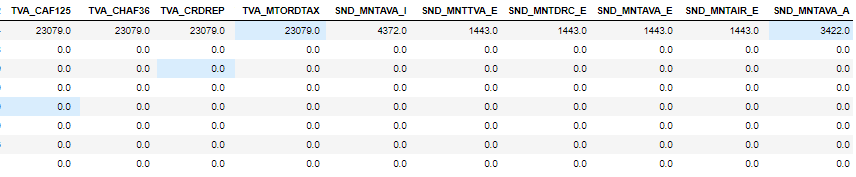

## <a id='2'><center><font color="INDIANRED">2) Comprendre les données</font></center></a>

### <a id='2-1'><center><font color="steelblue">2-1) Analyse de la forme</font></center></a>

#### <a id='2-1-1'><center><font color="green">2-1-1) La target</font></center></a>

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

_fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
_colors = ['#DF7401','#D7DF01','#3ADF00', '#01DFA5','#0101DF', '#DF01D7']

Constitution de deux DF regroupant 
- la catégorie que je nomme 0 où les valeurs de target sont à 0 
- et la catégorie que je nomme 1 pour les autres valeurs.
  - catégorie 0 : target = 0 taille : 6325 lignes
  - catégorie 1 : target différent de 0 : 18728 lignes

In [205]:
df_cat_0 = df_train_initial[df_train_initial['target']==0]
df_cat_1 = df_train_initial[df_train_initial['target']!=0]

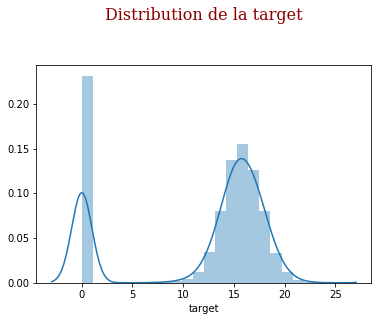

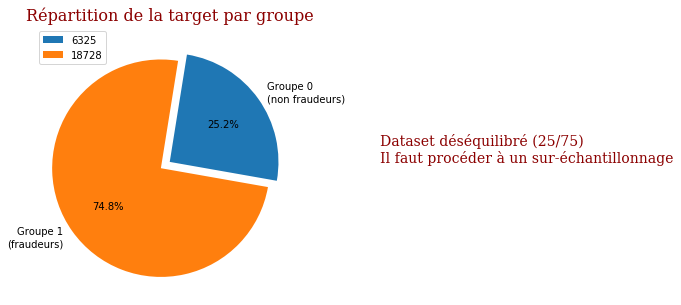

In [206]:
# Distribution par displot
ax1=sns.distplot(df_train_initial['target'])
ax1=plt.title('Distribution de la target\n\n', fontdict=_fontdict)

# Répartition par camembert et par groupe
ax2=plt.figure(figsize =(6,5)) 
distribution = [df_cat_0.shape[0], df_cat_1.shape[0]]
ax2=plt.pie(
    distribution, 
    labels = ["Groupe 0\n(non fraudeurs)","Groupe 1\n(fraudeurs)"], 
    autopct='%1.1f%%',
    explode=[0,0.1],
    startangle=-10
) 
ax2=plt.title("Répartition de la target par groupe", fontdict=_fontdict)
ax2=plt.legend(distribution)

# Commentaire

ax3=plt.figtext(
    x=1, 
    y=0.5, 
    s = "Dataset déséquilibré (25/75)\nIl faut procéder à un sur-échantillonnage",
    fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
)
ax3=plt.axis('off')
del distribution; del ax1; del ax2; del ax3

Dans l'objectif de pouvoir faire une classification et pour simplifier l'analyse :
- je vais ajouter une colonne `GROUP` qui indiquera :
  - 0 pour les non-fraudeurs (`target==0`) 
  - 1 pour les fraudeurs (`target!=0`)

Peut-être que je la supprimerai avant la partie modeling.

In [207]:
df_train_initial['GROUP'] = df_train_initial.target.apply(lambda x: 
                               1 if x!=0 
                               else 0)

In [208]:
df_train_initial['GROUP'].value_counts()

1    18728
0     6325
Name: GROUP, dtype: int64

## <a id='tableau descriptif'><font color='red'>Création d'un tableau descriptif des colonnes</font>

### Colonnes de ce tableau :
- Le code de chaque colonne
- sa description depuis le tableau de description
- le taux de nan par colonnes
- le nombre de valeurs renseignées
- le nombre de valeurs manquantes
- les valeurs maximums

- [Création de groupes de features discriminés en fonction du taux de nan et un groupe obligation avec un regex](#recueil)

A partir du tableau de description des variables fourni pour cette étude

In [209]:
ppl.exhaustiveDescribe(df_VariableDescription_initial)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Libellé   147 non-null    object
 1   Intitulé  125 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


Shape 
 
 
 
 
 Lines 
 157 
 
 
 Columns 
 2 
 
 
 
 
 
 
 Libellé 
 Intitulé 
 
 
 
 
 0 
 Contribuable 
 NaN 
 
 
 1 
 BCT_CODBUR 
 Code Bureau de contrôle des impôts 
 
 
 2 
 CTR_MATFIS 
 ID Contribuable 
 
 
 3 
 CTR_CATEGO_X 
 Catégorie Contribuable 
 
 
 4 
 CTR_CODTVA 
 Code TVA 
 
 
 5 
 FJU_CODFJU 
 Code Forme Juridique 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Number of NaN 
 
 
 
 
 Libellé 
 10 
 
 
 Intitulé 
 32 
 
 
 
 
 
 
 Libellé 
 Intitulé 
 
 
 
 
 count 
 147 
 125 
 
 
 unique 
 138 
 122 
 
 
 top 
 Err :510 
 Crédit Initial 
 
 
 freq 
 4 
 2

### Avant de créer les groupes je supprime les colonnes nulles

In [210]:
df_train_initial.shape

(25053, 122)

In [211]:
df_clean = df_train_initial.copy()

In [212]:
df_clean.shape

(25053, 122)

In [213]:
dcolumns_max0 = df_nans[df_nans['MaxValue']==0]['key_0']
columns_droped = [dcolumns_max0]
df_clean.drop(dcolumns_max0, axis=1, inplace=True)

10 colonnes supprimées

In [214]:
dcolumns_max0

Series([], Name: key_0, dtype: object)

In [215]:
df_clean.shape

(25053, 122)

In [216]:
df = df_clean
sum_na = df.isna().sum()
lines = df.shape[0]
# Colonnes désirées
df_nans= pd.DataFrame(sum_na, columns=["Number of NaN"])
df_nans["Percents Nan"] = pd.DataFrame(sum_na/lines)
df_nans["Values count"] = lines-sum_na
df_nans["MaxValue"] = df.max()
# Suppresion du df que je n'utilise plus.
del df
# Jointure description
df_nans = df_nans.merge(
    df_VariableDescription_initial,
    right_index=False,
    left_index=True,
    left_on=df_nans.index,
    right_on=df_VariableDescription_initial['Libellé ']
)
#Suppression de l'index Libellé qui se répète à cause de la jointure
df_nans.drop(['Libellé '], axis=1,inplace=True)

- 11 features n'ont pas de descriptions.
- la feature FACAGR n'existe pas dans le dataset initial bien qu'elle soit renseignée dans la description

In [217]:
df_nans[df_nans['Intitulé'].isna()].shape

(12, 6)

Comparaison des intitulés NaNs de df_nans et de leur équivalent pour trouver une raison à leur valeur NaN.
On constate que le tableau de description des variables était imparfait.
 - Présence de nans
 - colonnes dupliquées
 - une catégorie qui n'est pas présente dans le tableau qu'il décrit. `FACGR`

In [218]:
ppl.display_side_by_side(
    df_nans[df_nans['Intitulé'].isna()].sort_values(by="Number of NaN", ascending=False).style.background_gradient().set_properties(**{'text-align': 'left'}), 
    df_VariableDescription_initial[df_VariableDescription_initial['Intitulé'].isna()])

,key_0,Number of NaN,Percents Nan,Values count,MaxValue,Intitulé
101,SND_MNTAIR_E,23610,0.942402,1443,0.000000,nan
142,FAC_MNTPRI_F,22940,0.915659,2113,3414506528000.000000,nan
143,FAC_MFODEC_F,22940,0.915659,2113,8897885460.000000,nan
144,FAC_MNTDCO_F,22940,0.915659,2113,175068942.000000,nan
145,FAC_MNTTVA_F,22940,0.915659,2113,160877683640.000000,nan
146,FAC_MNTPRI_C,22579,0.901249,2474,244547975282.000000,nan
147,FAC_MFODEC_C,22579,0.901249,2474,2438877355.000000,nan
148,FAC_MNTDCO_C,22579,0.901249,2474,26145000.000000,nan
149,FAC_MNTTVA_C,22579,0.901249,2474,44219978301.000000,nan
108,SND_MNTAIR_A,21631,0.863410,3422,88435547.000000,nan


#### 5 lignes en doublons

Ce dataframe à l'origine pour identifier les features en fonction de leur taux de remplissage, permet aussi de voir des doublons

In [219]:
df_nans.groupby(['Percents Nan', 'key_0']).sum().style.background_gradient().set_properties(**{'text-align': 'left'})

#### Visualisation des valeurs repérées comme doublons

In [220]:
df_nans[(df_nans['key_0']=='FAC_MNTTVA_C')|(df_nans['key_0']=='CTR_MATFIS')]

,key_0,...,Intitulé
2,CTR_MATFIS,...,ID Contribuable
139,CTR_MATFIS,...,Matricule fiscal
153,CTR_MATFIS,...,Matricule fiscal
125,FAC_MNTTVA_C,...,Montant TVA sur factures en suspension de Taxes
149,FAC_MNTTVA_C,...,NaN


La jointure n'a peut-être pas si bien fonctionné.
Conservons seulement le `CTR_MATFIS` avec l'intitulé `Matricule fiscal` qui est plus parlant.
Supprimons le `FAC_MNTTVA_C` dont l'intitulé est un `Nan`

Suppression des doublons. Je garde les plus signifiants

In [221]:
df_nans.drop([2, 139, 149], axis=0, inplace=True)
df_nans[(df_nans['key_0']=='FAC_MNTTVA_C')|(df_nans['key_0']=='CTR_MATFIS')]

,key_0,...,Intitulé
153,CTR_MATFIS,...,Matricule fiscal
125,FAC_MNTTVA_C,...,Montant TVA sur factures en suspension de Taxes


nombre de colonnes du dataset initial 
 - moins la colonne target, group, id
 - moins le nombre de colonne du dataset de description joint au dataset des nans 
   - = 1 feature a échappé à la jointure. Mais je ne sais pas encore laquelle.

In [222]:
df_nans.shape[0]

118

In [223]:
df_clean.shape[1]-df_nans.shape[0]-3

1

## Tableau descriptif final
Affichons une nouvelle fois le `df_nans` 

In [224]:
df_nans.sort_values(by="Number of NaN", ascending=False).style.background_gradient(cmap='OrRd').set_properties(**{'text-align': 'left'})

,key_0,Number of NaN,Percents Nan,Values count,MaxValue,Intitulé
95,SND_MNTPRD_E,23610,0.942402,1443,44408418107.000000,Montant Produit Exporté
101,SND_MNTAIR_E,23610,0.942402,1443,0.000000,nan
96,SND_MNTTVA_E,23610,0.942402,1443,0.000000,Montant TVA à l'Exportation
97,SND_MNTDRC_E,23610,0.942402,1443,0.000000,Montant Droit de Consommation à l'Exportation
98,SND_MNTAVA_E,23610,0.942402,1443,0.000000,Montant Avance à l'Exportation
99,SND_MNTTAX_E,23610,0.942402,1443,826592900.000000,Montant Autres Taxes Payés à l'Exportation
100,SND_MNTPAY_E,23610,0.942402,1443,826592900.000000,Montant Total Payé à l'Exportation
145,FAC_MNTTVA_F,22940,0.915659,2113,160877683640.000000,nan
144,FAC_MNTDCO_F,22940,0.915659,2113,175068942.000000,nan
143,FAC_MFODEC_F,22940,0.915659,2113,8897885460.000000,nan


# GroupBy Taux de remplissage révèle des groupes
On peut constater qu'on peut regrouper les features par leur taux de remplissage.
- **Celles d'un même groupe sont souvent de la même famille.**

In [225]:
(df_nans
     .groupby(['Percents Nan', 'key_0']).sum()
     .style.background_gradient(cmap="RdPu")
     .set_properties(**{'text-align': 'left'})
)

# -  <a id='recueil'><br><font color="red">Receuil des colonnes dans l'ordre du taux de nan</font></a>
<left><font size=4>[Passer la liste](#recueilbas)</font></left><br>
Tout ce travail sur les nans nous a permis de constituer 10 groupes de données qui ont les mêmes caractéristiques et sont décrites comme étant de la même famille. 
- Nous pourrons donc entrainer nos modèles sur des groupes de données que nous auront très bien identifié. Voici ces 10 groupes et les élements qui les compose.
<br><br>
 - <font color='#088A4B'>**columns_codes** : codes et année d'exercices (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations_0** : Obligations (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations** : Obligations</font>
 - <font color='#088A4B'>**columns_TVA** : Toutes les TVA</font>
 - <font color='#088A4B'>**columns_revenus** : Les différents revenus</font>
 - <font color='#088A4B'>**columns_ordonnance** : </font>
 - <font color='#088A4B'>**columns_autres_regimes** :</font>
 - <font color='#088A4B'>**columns_facture_suspension** : Les factures en suspension</font>
 - <font color='#088A4B'>**column_facture_F** : Les factures de type F, F est une données inconnue</font>
 - <font color='#088A4B'>**columns_exportation** :</font>
 <br><br>
 - <font color='#088A4B'>columns_codes : codes et année d'exercices (0 nans)</font>
    - <font color='#8904B1'>1        BCT_CODBUR</font>
    - <font color='#8904B1'>153      CTR_MATFIS</font>
    - <font color='#8904B1'>3      CTR_CATEGO_X</font>
    - <font color='#8904B1'>5        FJU_CODFJU</font>
    - <font color='#8904B1'>6        CTR_CESSAT</font>
    - <font color='#8904B1'>7        ACT_CODACT</font>
    - <font color='#8904B1'>25       CTR_RATISS</font>
    - <font color='#8904B1'>27       EXE_EXERCI</font>
  - <font color='#088A4B'>columns_obligations_0 : Obligations (0 nans)</font>
    - <font color='#8904B1'>8     CTR_OBLDIR</font>
    - <font color='#8904B1'>9     CTR_OBLACP</font>
    - <font color='#8904B1'>10    CTR_OBLRES</font>
    - <font color='#8904B1'>11    CTR_OBLFOP</font>
    - <font color='#8904B1'>12    CTR_OBLTFP</font>
    - <font color='#8904B1'>13    CTR_OBLDCO</font>
    - <font color='#8904B1'>14    CTR_OBLTVA</font>
    - <font color='#8904B1'>21    CTR_OBLTCL</font>
  - <font color='#088A4B'>columns_obligations : Obligations</font>
    - <font color='#8904B1'>15    CTR_OFODEC</font>
    - <font color='#8904B1'>16    CTR_OFODEP</font>
    - <font color='#8904B1'>17    CTR_OFODET</font>
    - <font color='#8904B1'>18    CTR_OBLAUT</font>
    - <font color='#8904B1'>19    CTR_OBLASS</font>
    - <font color='#8904B1'>20    CTR_ODTIMB</font>
    - <font color='#8904B1'>22    CTR_OBLTHO</font>
    - <font color='#8904B1'>23    CTR_OBLDLI</font>
    - <font color='#8904B1'>24    CTR_OBLTVI</font>
  - <font color='#088A4B'>columns_TVA : Toutes les TVA</font>
    - <font color='#8904B1'>28      TVA_CHAFF6</font>
    - <font color='#8904B1'>29      TVA_CHAFF7</font>
    - <font color='#8904B1'>30      TVA_CHAF10</font>
    - <font color='#8904B1'>31      TVA_CHAF12</font>
    - <font color='#8904B1'>32      TVA_CAF125</font>
    - <font color='#8904B1'>33      TVA_CHAF15</font>
    - <font color='#8904B1'>34      TVA_CHAF18</font>
    - <font color='#8904B1'>35      TVA_CHAF22</font>
    - <font color='#8904B1'>36      TVA_CHAF29</font>
    - <font color='#8904B1'>37      TVA_CHAF36</font>
    - <font color='#8904B1'>38      TVA_TOTDUE</font>
    - <font color='#8904B1'>39      TVA_MOIDEB</font>
    - <font color='#8904B1'>40      TVA_CRDINI</font>
    - <font color='#8904B1'>41      TVA_BASIMB</font>
    - <font color='#8904B1'>42      TVA_DEDIMB</font>
    - <font color='#8904B1'>43      TVA_BASEQL</font>
    - <font color='#8904B1'>44      TVA_DEDEQL</font>
    - <font color='#8904B1'>45      TVA_BASEQI</font>
    - <font color='#8904B1'>46      TVA_DEDEQI</font>
    - <font color='#8904B1'>47      TVA_BASAUL</font>
    - <font color='#8904B1'>48      TVA_DEDAUL</font>
    - <font color='#8904B1'>49      TVA_BASAUI</font>
    - <font color='#8904B1'>50      TVA_DEDAUI</font>
    - <font color='#8904B1'>51      TVA_BASRSM</font>
    - <font color='#8904B1'>52      TVA_DEDRSM</font>
    - <font color='#8904B1'>53      TVA_RSNRES</font>
    - <font color='#8904B1'>54      TVA_TRSPOR</font>
    - <font color='#8904B1'>55      TVA_DEDREG</font>
    - <font color='#8904B1'>56      TVA_RESTIT</font>
    - <font color='#8904B1'>57      TVA_MNTPAY</font>
    - <font color='#8904B1'>58      TVA_MOIFIN</font>
    - <font color='#8904B1'>59      TVA_CRDFIN</font>
    - <font color='#8904B1'>60      TVA_ACHSUS</font>
    - <font color='#8904B1'>61      TVA_ACHEXO</font>
    - <font color='#8904B1'>62      TVA_ACHNDD</font>
    - <font color='#8904B1'>63      TVA_CAFEXP</font>
    - <font color='#8904B1'>64      TVA_CAFSUS</font>
    - <font color='#8904B1'>65      TVA_CAFEXO</font>
    - <font color='#8904B1'>66      TVA_AACHAB</font>
    - <font color='#8904B1'>67      TVA_CRDBLQ</font>
    - <font color='#8904B1'>68      TVA_CRDRES</font>
    - <font color='#8904B1'>69      TVA_CRDRMP</font>
    - <font color='#8904B1'>70      TVA_CRDREP</font>
    - <font color='#8904B1'>71      TVA_CRDRMC</font>
    - <font color='#8904B1'>72       TVA_MACHN</font>
    - <font color='#8904B1'>73       TVA_MCESQ</font>
    - <font color='#8904B1'>74      TVA_MTVLSM</font>
    - <font color='#8904B1'>75      TVA_TXVLSM</font>
    - <font color='#8904B1'>76      TVA_MTALSM</font>
    - <font color='#8904B1'>77      TVA_TXALSM</font>
    - <font color='#8904B1'>78    TVA_MTORDTVA</font>
    - <font color='#8904B1'>79    TVA_MTDJRTVA</font>
    - <font color='#8904B1'>80    TVA_MTORDTAX</font>
    - <font color='#8904B1'>81    TVA_MTDJRTAX</font>
    - <font color='#8904B1'>82    TVA_MTRESTAX</font>
    - <font color='#8904B1'>83    TVA_CA072018</font>
    - <font color='#8904B1'>84    TVA_CA132018</font>
    - <font color='#8904B1'>85    TVA_CA192018</font>
  - <font color='#088A4B'>columns_revenus : Les différents revenus</font>
    - <font color='#8904B1'>109    AX1_BRTIMP</font>
    - <font color='#8904B1'>110    AX2_HONORA</font>
    - <font color='#8904B1'>111    AX2_LOYERS</font>
    - <font color='#8904B1'>112    AX3_REVCAP</font>
    - <font color='#8904B1'>113    AX5_MNTMAR</font>
  - <font color='#088A4B'>columns_ordonnance : </font>
    - <font color='#8904B1'>87    ADB_MNTORD</font>
  - <font color='#088A4B'>columns_importation :</font>
    - <font color='#8904B1'>88    SND_MNTPRD_I</font>
    - <font color='#8904B1'>89    SND_MNTTVA_I</font>
    - <font color='#8904B1'>90    SND_MNTDRC_I</font>
    - <font color='#8904B1'>91    SND_MNTAVA_I</font>
    - <font color='#8904B1'>92    SND_MNTTAX_I</font>
    - <font color='#8904B1'>93    SND_MNTPAY_I</font>
    - <font color='#8904B1'>94    SND_MNTAIR_I</font>
  - <font color='#088A4B'>columns_autres_regimes :</font>
    - <font color='#8904B1'>102    SND_MNTPRD_A</font>
    - <font color='#8904B1'>103    SND_MNTTVA_A</font>
    - <font color='#8904B1'>104    SND_MNTDRC_A</font>
    - <font color='#8904B1'>105    SND_MNTAVA_A</font>
    - <font color='#8904B1'>106    SND_MNTTAX_A</font>
    - <font color='#8904B1'>107    SND_MNTPAY_A</font>
    - <font color='#8904B1'>108    SND_MNTAIR_A</font>
  - <font color='#088A4B'>columns_facture_suspension : Les factures en suspension</font>
    - <font color='#8904B1'>146    FAC_MNTPRI_C</font>
    - <font color='#8904B1'>147    FAC_MFODEC_C</font>
    - <font color='#8904B1'>148    FAC_MNTDCO_C</font>
    - <font color='#8904B1'>125    FAC_MNTTVA_C</font>
  - <font color='#088A4B'>column_facture_F : Les factures de type F, F est une données inconnue</font>
    - <font color='#8904B1'>142    FAC_MNTPRI_F</font>
    - <font color='#8904B1'>143    FAC_MFODEC_F</font>
    - <font color='#8904B1'>144    FAC_MNTDCO_F</font>
    - <font color='#8904B1'>145    FAC_MNTTVA_F</font>
  - <font color='#088A4B'>columns_exportation :</font>
    - <font color='#8904B1'>95     SND_MNTPRD_E</font>
    - <font color='#8904B1'>96     SND_MNTTVA_E</font>
    - <font color='#8904B1'>97     SND_MNTDRC_E</font>
    - <font color='#8904B1'>98     SND_MNTAVA_E</font>
    - <font color='#8904B1'>99     SND_MNTTAX_E</font>
    - <font color='#8904B1'>100    SND_MNTPAY_E</font>
    - <font color='#8904B1'>101    SND_MNTAIR_E</font>
    <a id='recueilbas'>
</a>

In [239]:
# 1er Group 
columns_codes = df_nans[(df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[0])&(df_nans['key_0'].str.match('^CTR_OBL.*')== False)]['key_0'].values
columns_obligations_0 = df_nans[(df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[0])&(df_nans['key_0'].str.match('^CTR_OBL.*')== True)]['key_0'].values
# Groups du 2e au 10e
columns_obligations = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[1]]['key_0'].values
columns_TVA = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[2]]['key_0'].values
columns_revenus = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[3]]['key_0'].values
columns_ordonnance = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[4]]['key_0'].values
columns_importation = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[5]]['key_0'].values
columns_autres_regimes = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[6]]['key_0'].values
columns_facture_suspension = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[7]]['key_0'].values
columns_facture_F = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[8]]['key_0'].values
columns_exportation = df_nans[df_nans['Percents Nan']==sorted(df_nans['Percents Nan'].unique())[9]]['key_0'].values


In [240]:
columns_groups = [
    columns_codes,
    columns_obligations_0,
    columns_obligations,
    columns_TVA,
    columns_revenus,
    columns_ordonnance,
    columns_importation,
    columns_autres_regimes,
    columns_facture_suspension,
    columns_facture_F,
    columns_exportation
]

Etudes particulière du groupe TVA

Creation de dataframes pour chaque catégorie avec un drop na.

In [250]:
# CODES
df_codes_dna = pd.DataFrame(df_train_initial[columns_codes])
n_lines_before = df_codes_dna.shape[0]
df_codes_dna.dropna(inplace=True)
df_codes_dna.to_csv("./New_datasets/codes_dna.csv")
print("\n Number of lines dropped CODES after dropna : \n",n_lines_before-df_codes_dna.shape[0])

# OBLIGATIONS_0
df_obligations_0_dna = pd.DataFrame(df_train_initial[columns_obligations_0])
n_lines_before = df_obligations_0_dna.shape[0]
df_obligations_0_dna.dropna(inplace=True)
df_obligations_0_dna.to_csv("./New_datasets/obligations_0_dna.csv")
print("\n Number of lines dropped OBLIGATIONS_0 after dropna : \n",n_lines_before-df_obligations_0_dna.shape[0])

# OBLIGATIONS
df_obligations_dna = pd.DataFrame(df_train_initial[columns_obligations])
n_lines_before = df_obligations_dna.shape[0]
df_obligations_dna.dropna(inplace=True)
df_obligations_dna.to_csv("./New_datasets/obligations_dna.csv")
print("\n Number of lines dropped OBLIGATIONS after dropna : \n",n_lines_before-df_obligations_dna.shape[0])

# TVA
df_TVA_dna = pd.DataFrame(df_train_initial[columns_TVA])
n_lines_before = df_TVA_dna.shape[0]
df_TVA_dna.dropna(inplace=True)
df_TVA_dna.to_csv("./New_datasets/TVA_dna.csv")
print("\n Number of lines dropped TVA after dropna : \n",n_lines_before-df_TVA_dna.shape[0])

# REVENUS
df_revenus_dna = pd.DataFrame(df_train_initial[columns_revenus])
n_lines_before = df_revenus_dna.shape[0]
df_revenus_dna.dropna(inplace=True)
df_revenus_dna.to_csv("./New_datasets/revenus_dna.csv")
print("\n Number of lines dropped REVENUS after dropna : \n",n_lines_before-df_revenus_dna.shape[0])

# ORDONNANCE
df_ordonnance_dna = pd.DataFrame(df_train_initial[columns_ordonnance])
n_lines_before = df_ordonnance_dna.shape[0]
df_ordonnance_dna.dropna(inplace=True)
df_ordonnance_dna.to_csv("./New_datasets/ordonnance_dna.csv")
print("\n Number of lines dropped ORDONNANCE after dropna : \n",n_lines_before-df_ordonnance_dna.shape[0])

# IMPORTATION
df_importation_dna = pd.DataFrame(df_train_initial[columns_importation])
n_lines_before = df_importation_dna.shape[0]
df_importation_dna.dropna(inplace=True)
df_importation_dna.to_csv("./New_datasets/importation_dna.csv")
print("\n Number of lines dropped IMPORTATION after dropna : \n",n_lines_before-df_importation_dna.shape[0])

# AUTRES_REGIMES
df_autres_regimes_dna = pd.DataFrame(df_train_initial[columns_autres_regimes])
n_lines_before = df_autres_regimes_dna.shape[0]
df_autres_regimes_dna.dropna(inplace=True)
df_autres_regimes_dna.to_csv("./New_datasets/autres_regimes_dna.csv")
print("\n Number of lines dropped AUTRES_REGIMES after dropna : \n",n_lines_before-df_autres_regimes_dna.shape[0])

# FACTURE_SUSPENSION
df_facture_suspension_dna = pd.DataFrame(df_train_initial[columns_facture_suspension])
n_lines_before = df_facture_suspension_dna.shape[0]
df_facture_suspension_dna.dropna(inplace=True)
df_facture_suspension_dna.to_csv("./New_datasets/facture_suspension_dna.csv")
print("\n Number of lines dropped FACTURE_SUSPENSION after dropna : \n",n_lines_before-df_facture_suspension_dna.shape[0])

# FACTURE_F
df_facture_F_dna = pd.DataFrame(df_train_initial[columns_facture_F])
n_lines_before = df_facture_F_dna.shape[0]
df_facture_F_dna.dropna(inplace=True)
df_facture_F_dna.to_csv("./New_datasets/facture_F_dna.csv")
print("\n Number of lines dropped FACTURE_F after dropna : \n",n_lines_before-df_facture_F_dna.shape[0])

# EXPORTATION
df_exportation_dna = pd.DataFrame(df_train_initial[columns_exportation])
n_lines_before = df_exportation_dna.shape[0]
df_exportation_dna.dropna(inplace=True)
df_exportation_dna.to_csv("./New_datasets/exportation_dna.csv")
print("\n Number of lines dropped EXPORTATION after dropna : \n",n_lines_before-df_exportation_dna.shape[0])



 Number of lines dropped CODES after dropna : 
 0

 Number of lines dropped OBLIGATIONS_0 after dropna : 
 0

 Number of lines dropped OBLIGATIONS after dropna : 
 10

 Number of lines dropped TVA after dropna : 
 1974

 Number of lines dropped REVENUS after dropna : 
 6043

 Number of lines dropped ORDONNANCE after dropna : 
 18742

 Number of lines dropped IMPORTATION after dropna : 
 20681

 Number of lines dropped AUTRES_REGIMES after dropna : 
 21631

 Number of lines dropped FACTURE_SUSPENSION after dropna : 
 22579

 Number of lines dropped FACTURE_F after dropna : 
 22940

 Number of lines dropped EXPORTATION after dropna : 
 23610


#### <a id='2-2-3'><center><font color="green">2-2-3) Corrélations features - target</font></center></a>

In [228]:
ppl.display_side_by_side(df_train_initial[columns_autres_regimes].describe())

,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A
count,3.422000e+03,3.422000e+03,3.422000e+03,3422.0,3.422000e+03,3.422000e+03,3.422000e+03
mean,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,5.496511e+04
std,5.212537e+10,4.681317e+07,4.883439e+07,0.0,1.769856e+07,8.109242e+07,1.905128e+06
min,9.911300e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+07,0.000000e+00,0.000000e+00,0.0,2.000000e+04,2.000000e+04,0.000000e+00
50%,7.912158e+07,0.000000e+00,0.000000e+00,0.0,9.000000e+04,1.000000e+05,0.000000e+00
75%,8.230976e+08,0.000000e+00,0.000000e+00,0.0,4.000000e+05,4.700000e+05,0.000000e+00
max,1.102120e+12,2.591643e+09,2.206092e+09,0.0,9.622800e+08,3.487046e+09,8.843555e+07


In [229]:
df_clean['CTR_CATEGO_X'] = (df_train_initial
                                    .CTR_CATEGO_X
                                    .apply(lambda x: 
                                           0 if x=='M' 
                                           else 1 if x=='C' 
                                           else 2 if x=='P' 
                                           else 3
                                          )
                                   )

In [230]:
df_nans[df_nans['key_0']=='TVA_CA1322018']['Intitulé']

Series([], Name: Intitulé, dtype: object)

```python
df = df_clean.copy()
for columns in columns_groups:
    column_displayed = columns
    print(column_displayed)
    for col in column_displayed :
        print(f'\nPour la colonne : {col}{pd.DataFrame(df[col].unique())}')
        sns.distplot(
            df[(df['GROUP']==0)&(df[col]>0)][col], 
            color='green',
            kde_kws={'bw': 0.1}
        )
        sns.distplot(
            df[(df['GROUP']==1)&(df[col]>0)][col], 
            color='red',
            kde_kws={'bw': 0.1}
        )
        plt.title((col + "\n" + str(df_nans[df_nans['key_0']==col]['Intitulé'])), fontdict=_fontdict)
        plt.show()
del column_displayed; del columns; del df

```
Normalement les distplot donnent beaucoup d'information sur les colonnes par rapport aux targets, mais ici c'est très illisible. À la rigueur 3 graphique semblent parler. 
La colonne `TVA_CA1322018` semble montrer une disparité entre le groupe des non fraudeurs qui se situerait dans les plus grosses valeurs.

De plus les colonnes `SND_MNTTAX_E` et `SND_MNTPAY_E` semblent être des copies conformes.

![distplot](Figures/distplots.jpg)


['BCT_CODBUR' 'CTR_MATFIS' 'CTR_CATEGO_X' 'FJU_CODFJU' 'CTR_CESSAT'
 'ACT_CODACT' 'CTR_RATISS' 'EXE_EXERCI']

Pour la colonne : BCT_CODBUR       0
0     49
1    221
2    181
3    252
4    234
..   ...
153  236
154  225
155  194
156  162
157  212

[158 rows x 1 columns]


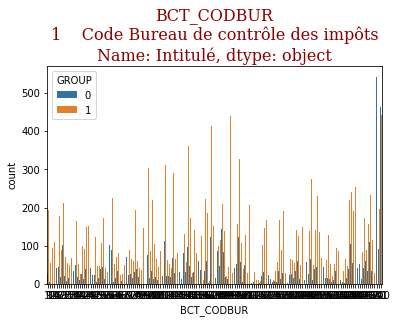


Pour la colonne : CTR_MATFIS           0
0      14185
1       6032
2       8907
3       5783
4       1477
...      ...
13449   2083
13450   5493
13451   5953
13452   9553
13453  12561

[13454 rows x 1 columns]


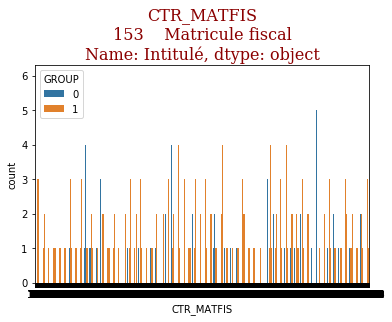


Pour la colonne : CTR_CATEGO_X   0
0  2
1  0
2  1
3  3


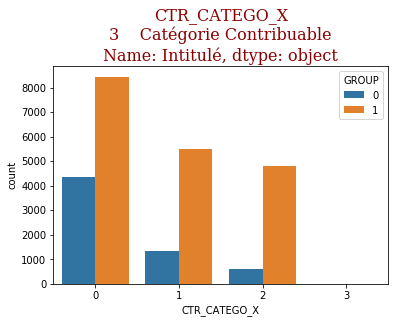


Pour la colonne : FJU_CODFJU     0
0   99
1   22
2   23
3   21
4   40
5   13
6   14
7   10
8   20
9   90
10  29
11  30
12  41
13  11
14  12
15  60


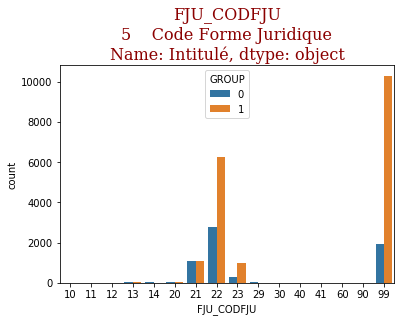


Pour la colonne : CTR_CESSAT   0
0  1
1  0
2  2


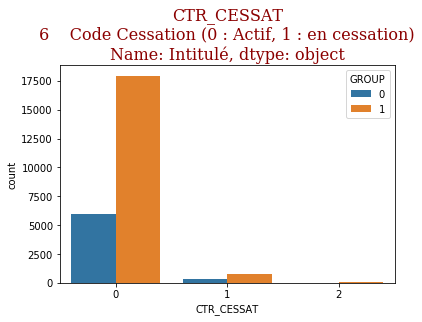


Pour la colonne : ACT_CODACT        0
0    6101
1    6271
2    6102
3    4403
4    6312
..    ...
527  1017
528  4412
529  5302
530  6106
531  3108

[532 rows x 1 columns]


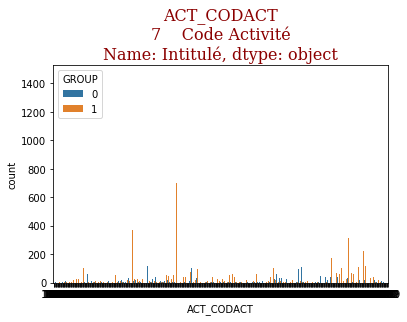


Pour la colonne : CTR_RATISS   0
0  0
1  2


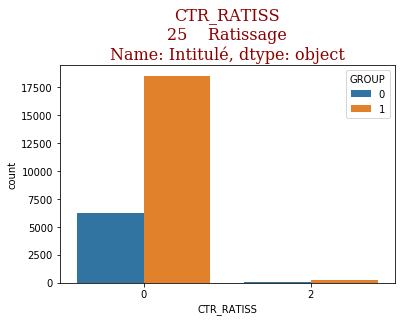


Pour la colonne : EXE_EXERCI      0
0  2013
1  2015
2  2014
3  2016
4  2017
5  2018


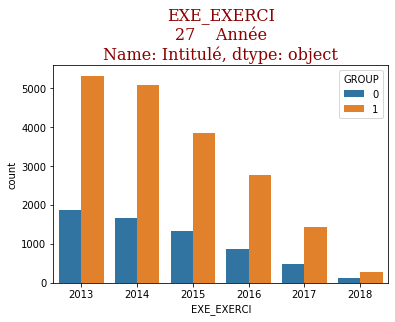

['CTR_OBLDIR' 'CTR_OBLACP' 'CTR_OBLRES' 'CTR_OBLFOP' 'CTR_OBLTFP'
 'CTR_OBLDCO' 'CTR_OBLTVA' 'CTR_OBLTCL']

Pour la colonne : CTR_OBLDIR   0
0  4
1  8
2  6
3  5
4  1
5  2
6  9


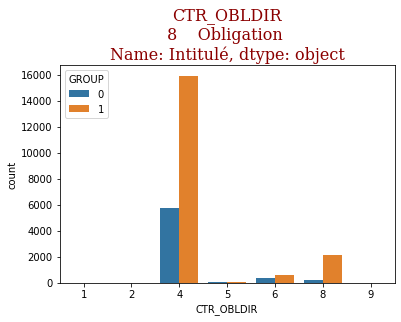


Pour la colonne : CTR_OBLACP   0
0  2
1  1


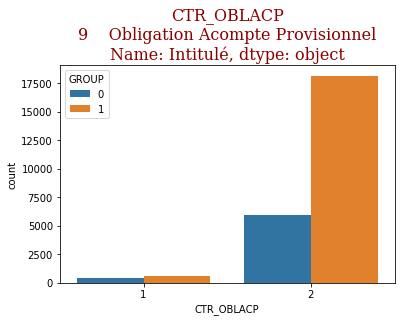


Pour la colonne : CTR_OBLRES   0
0  2
1  1
2  5


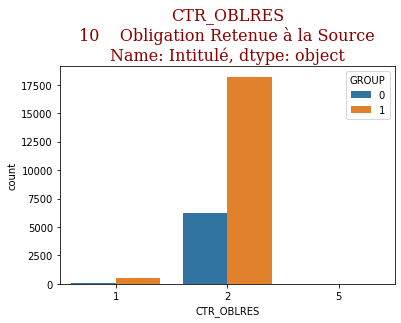


Pour la colonne : CTR_OBLFOP   0
0  2
1  1
2  3
3  5


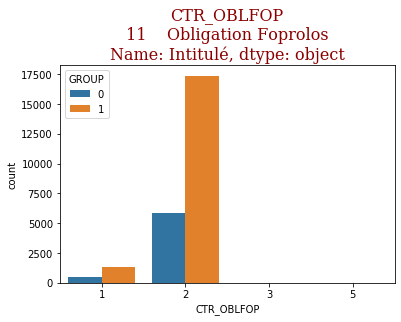


Pour la colonne : CTR_OBLTFP   0
0  2
1  1
2  3


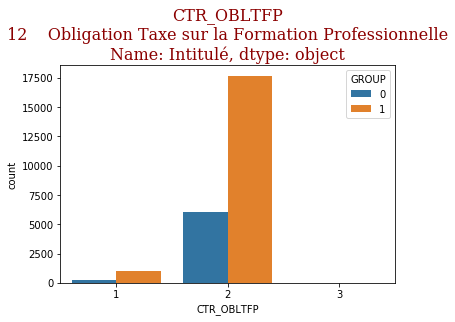


Pour la colonne : CTR_OBLDCO   0
0  1
1  2


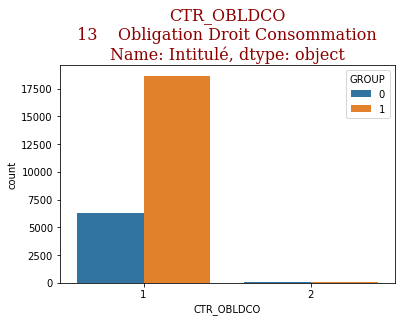


Pour la colonne : CTR_OBLTVA   0
0  2
1  3


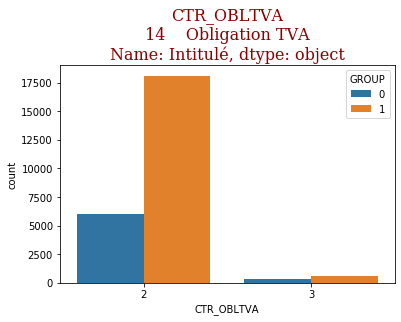


Pour la colonne : CTR_OBLTCL   0
0  3
1  1
2  2


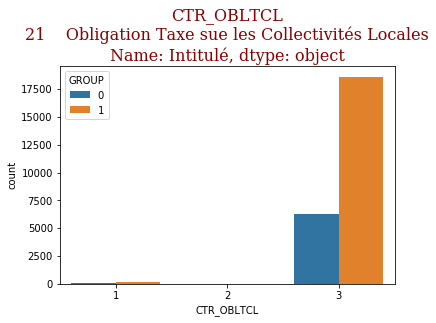

['CTR_OFODEC' 'CTR_OFODEP' 'CTR_OFODET' 'CTR_OBLAUT' 'CTR_OBLASS'
 'CTR_ODTIMB' 'CTR_OBLTHO' 'CTR_OBLDLI' 'CTR_OBLTVI']

Pour la colonne : CTR_OFODEC     0
0  1.0
1  2.0
2  NaN


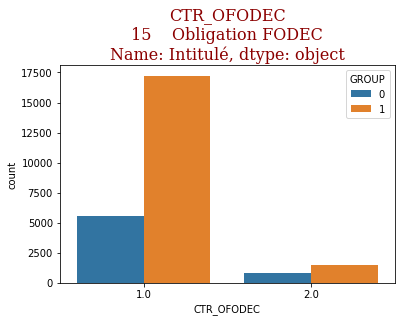


Pour la colonne : CTR_OFODEP     0
0  1.0
1  2.0
2  NaN


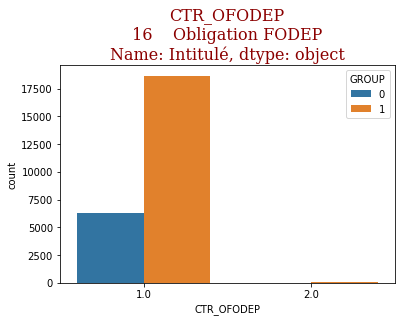


Pour la colonne : CTR_OFODET     0
0  1.0
1  2.0
2  NaN


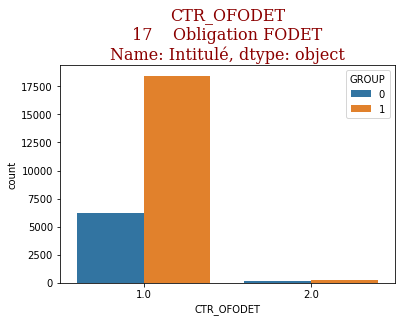


Pour la colonne : CTR_OBLAUT     0
0  1.0
1  2.0
2  NaN


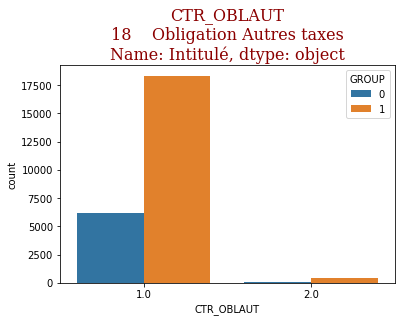


Pour la colonne : CTR_OBLASS     0
0  1.0
1  NaN
2  2.0


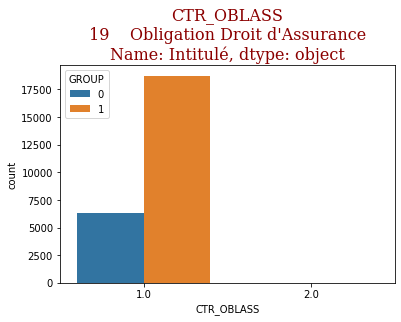


Pour la colonne : CTR_ODTIMB     0
0  1.0
1  2.0
2  NaN


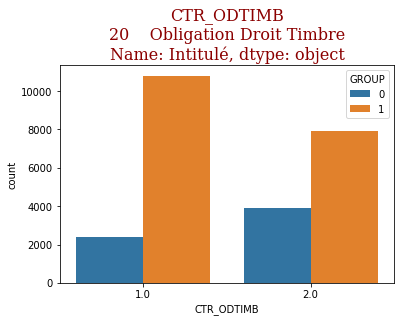


Pour la colonne : CTR_OBLTHO     0
0  1.0
1  2.0
2  NaN


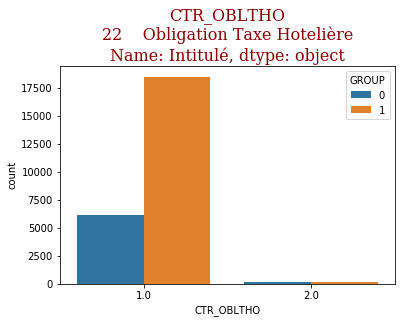


Pour la colonne : CTR_OBLDLI     0
0  1.0
1  2.0
2  NaN


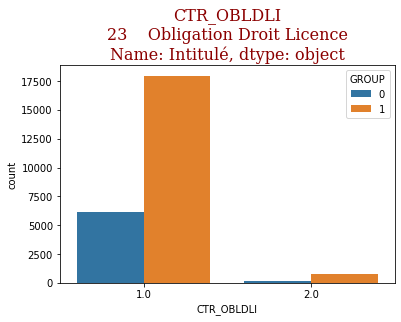


Pour la colonne : CTR_OBLTVI     0
0  1.0
1  2.0
2  NaN


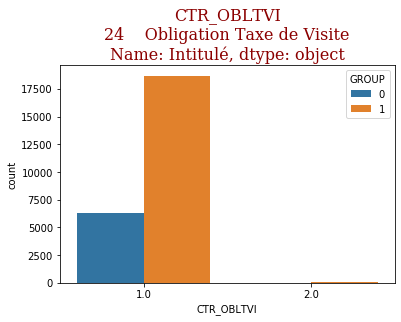

['TVA_CHAFF6' 'TVA_CHAFF7' 'TVA_CHAF10' 'TVA_CHAF12' 'TVA_CAF125'
 'TVA_CHAF15' 'TVA_CHAF18' 'TVA_CHAF22' 'TVA_CHAF29' 'TVA_CHAF36'
 'TVA_TOTDUE' 'TVA_MOIDEB' 'TVA_CRDINI' 'TVA_BASIMB' 'TVA_DEDIMB'
 'TVA_BASEQL' 'TVA_DEDEQL' 'TVA_BASEQI' 'TVA_DEDEQI' 'TVA_BASAUL'
 'TVA_DEDAUL' 'TVA_BASAUI' 'TVA_DEDAUI' 'TVA_BASRSM' 'TVA_DEDRSM'
 'TVA_RSNRES' 'TVA_TRSPOR' 'TVA_DEDREG' 'TVA_RESTIT' 'TVA_MNTPAY'
 'TVA_MOIFIN' 'TVA_CRDFIN' 'TVA_ACHSUS' 'TVA_ACHEXO' 'TVA_ACHNDD'
 'TVA_CAFEXP' 'TVA_CAFSUS' 'TVA_CAFEXO' 'TVA_AACHAB' 'TVA_CRDBLQ'
 'TVA_CRDRES' 'TVA_CRDRMP' 'TVA_CRDREP' 'TVA_CRDRMC' 'TVA_MACHN'
 'TVA_MCESQ' 'TVA_MTVLSM' 'TVA_TXVLSM' 'TVA_MTALSM' 'TVA_TXALSM'
 'TVA_MTORDTVA' 'TVA_MTDJRTVA' 'TVA_MTORDTAX' 'TVA_MTDJRTAX'
 'TVA_MTRESTAX' 'TVA_CA072018' 'TVA_CA132018' 'TVA_CA192018']

Pour la colonne : TVA_CHAFF6                0
0             0.0
1      12000000.0
2             NaN
3       2920800.0
4      42783020.0
...           ...
4346   22631650.0
4347   84584174.0
4348    8679245.0
4349   270

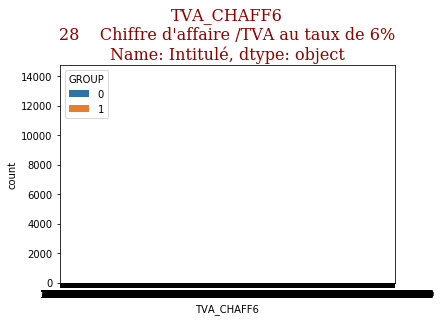


Pour la colonne : TVA_CHAFF7               0
0            0.0
1            NaN
2     95752932.0
3            8.0
4      2240000.0
5     25481631.0
6       195631.0
7        73467.0
8      2478816.0
9       205906.0
10         228.0
11     3341309.0
12     1048831.0
13   157289646.0
14     2782442.0
15      154440.0
16     5847107.0
17       42679.0
18     2587000.0
19     4954418.0
20       22083.0
21   325140173.0
22      275294.0
23     2398227.0
24        6240.0
25     1300054.0
26    77806149.0
27    27896768.0
28         325.0
29      681750.0
30      512893.0
31    25822618.0
32    17123900.0
33     1581416.0
34        8475.0
35    18686337.0
36    19028309.0
37   332447797.0
38           3.0
39       27000.0
40      456724.0
41     2494413.0
42      432462.0
43       30836.0
44      275655.0
45       79240.0
46    14034987.0
47      100101.0
48       67050.0
49           4.0
50       75067.0
51      228174.0
52      950000.0
53    20944300.0
54      649000.0
55     6268317.0
56

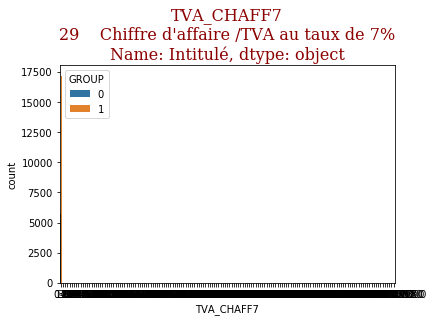


Pour la colonne : TVA_CHAF10             0
0          0.0
1          NaN
2    3861224.0
3     292228.0
4      60000.0
5     230850.0
6          4.0
7      96607.0
8          3.0
9   10000000.0
10     21500.0
11  25262491.0
12  14544138.0
13      1134.0


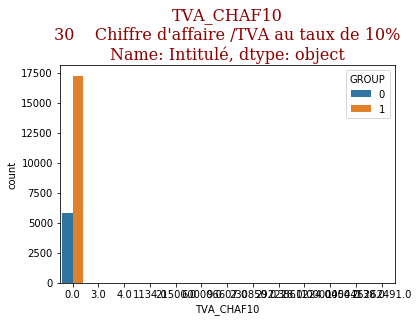


Pour la colonne : TVA_CHAF12                0
0      52600000.0
1             0.0
2      31926026.0
3      10999653.0
4     349968660.0
...           ...
5979      35000.0
5980   40260278.0
5981   10223214.0
5982  302386339.0
5983  107800000.0

[5984 rows x 1 columns]


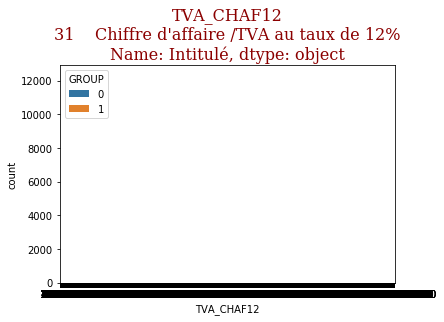


Pour la colonne : TVA_CAF125     0
0  0.0
1  NaN


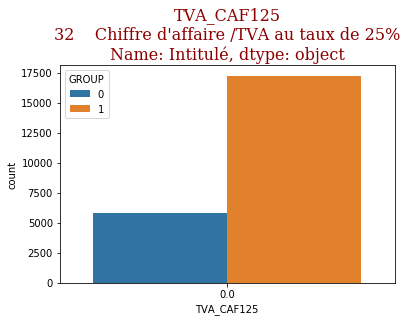


Pour la colonne : TVA_CHAF15              0
0           0.0
1           NaN
2      254003.0
3    10286078.0
4      230507.0
..          ...
244  38167851.0
245   1700000.0
246   7584316.0
247  24931258.0
248     35000.0

[249 rows x 1 columns]


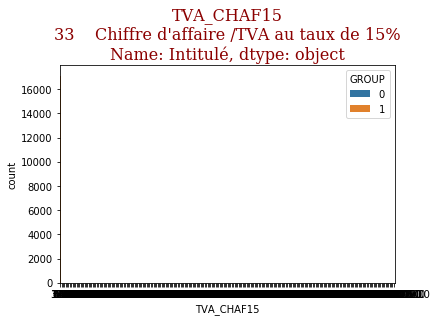


Pour la colonne : TVA_CHAF18                  0
0      6.125000e+05
1      0.000000e+00
2               NaN
3      8.693198e+07
4      1.231962e+09
...             ...
11785  2.337056e+10
11786  1.734567e+08
11787  7.600000e+06
11788  1.896805e+08
11789  1.943510e+09

[11790 rows x 1 columns]


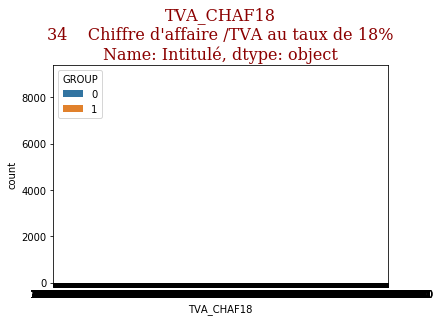


Pour la colonne : TVA_CHAF22                0
0             0.0
1             NaN
2     622740412.0
3      40792081.0
4        857352.0
...           ...
1329  777470527.0
1330   50461408.0
1331  442580805.0
1332     952963.0
1333  566264227.0

[1334 rows x 1 columns]


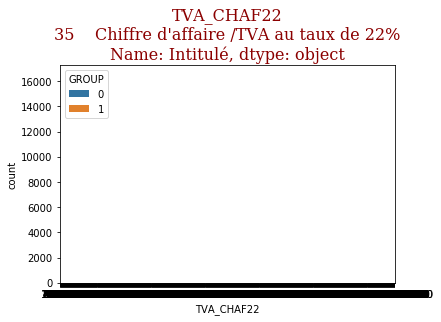


Pour la colonne : TVA_CHAF29          0
0       0.0
1       NaN
2   10324.0
3  217996.0
4      16.0
5  259287.0
6  940981.0
7       3.0
8   26547.0


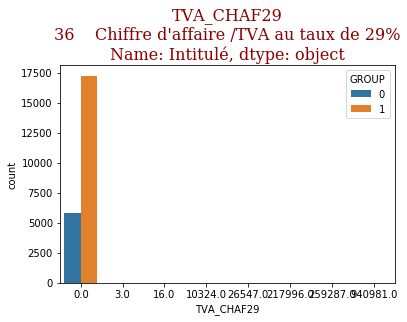


Pour la colonne : TVA_CHAF36     0
0  0.0
1  NaN


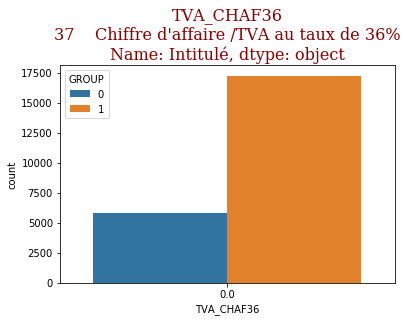


Pour la colonne : TVA_TOTDUE                 0
0        6422250.0
1         720000.0
2        3831117.0
3              0.0
4        1319958.0
...            ...
17496   37654354.0
17497   34142485.0
17498  349831750.0
17499    6565465.0
17500   12936000.0

[17501 rows x 1 columns]


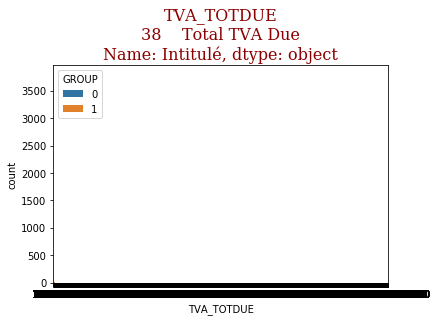


Pour la colonne : TVA_MOIDEB       0
0    1.0
1    NaN
2    9.0
3    4.0
4   12.0
5    3.0
6    7.0
7    6.0
8    5.0
9    8.0
10   2.0
11  10.0
12  11.0


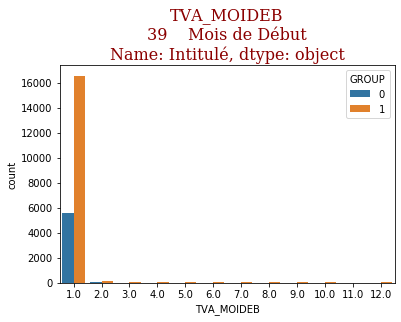


Pour la colonne : TVA_CRDINI                 0
0              0.0
1          45425.0
2       85713633.0
3              NaN
4       53487691.0
...            ...
11814      66508.0
11815   14601721.0
11816   10055960.0
11817  278182901.0
11818    2766494.0

[11819 rows x 1 columns]


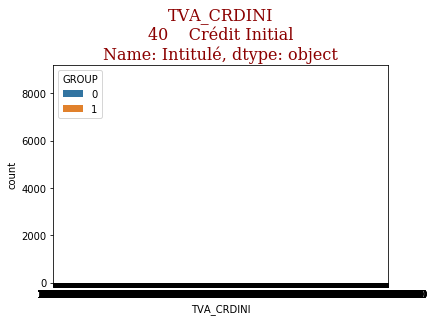


Pour la colonne : TVA_BASIMB               0
0            0.0
1            NaN
2     76683049.0
3      4516668.0
4    889900000.0
..           ...
332    1089277.0
333   83803800.0
334    9212955.0
335  857409175.0
336  156779661.0

[337 rows x 1 columns]


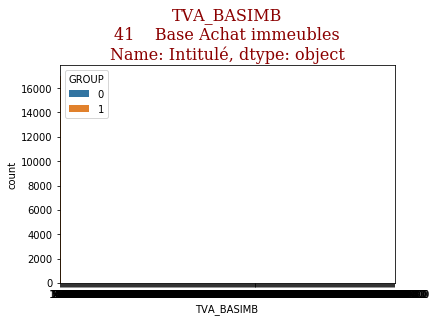


Pour la colonne : TVA_DEDIMB               0
0            0.0
1            NaN
2     13802947.0
3       813000.0
4    160182000.0
..           ...
327     196069.0
328   15084684.0
329    1658331.0
330  154333650.0
331   28220338.0

[332 rows x 1 columns]


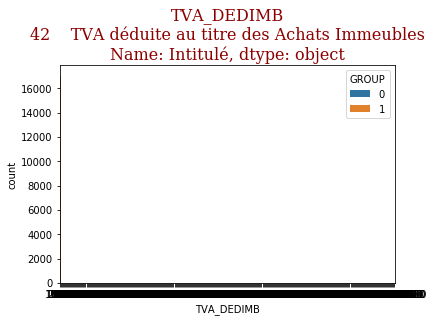


Pour la colonne : TVA_BASEQL               0
0            0.0
1      1521555.0
2            NaN
3     92583380.0
4      6182105.0
...          ...
6089   1272600.0
6090   2820750.0
6091  13044091.0
6092  32184219.0
6093   4676425.0

[6094 rows x 1 columns]


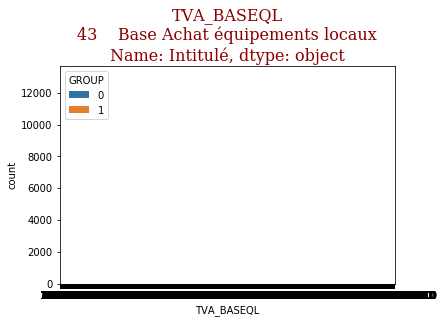


Pour la colonne : TVA_DEDEQL               0
0            0.0
1       273879.0
2            NaN
3     16665008.0
4      1112779.0
...          ...
6101   7466754.0
6102    169245.0
6103    853936.0
6104   5793159.0
6105    841756.0

[6106 rows x 1 columns]


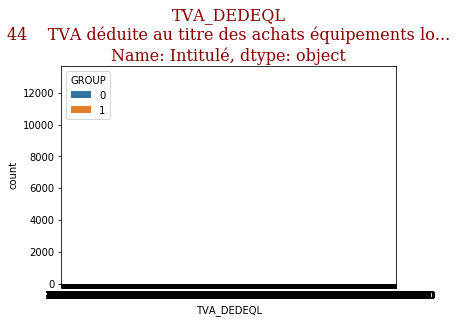


Pour la colonne : TVA_BASEQI                 0
0     0.000000e+00
1              NaN
2     5.243872e+08
3     2.303288e+08
4     2.316793e+08
...            ...
1937  5.957400e+05
1938  1.120927e+09
1939  6.602130e+07
1940  4.048400e+07
1941  7.663972e+07

[1942 rows x 1 columns]


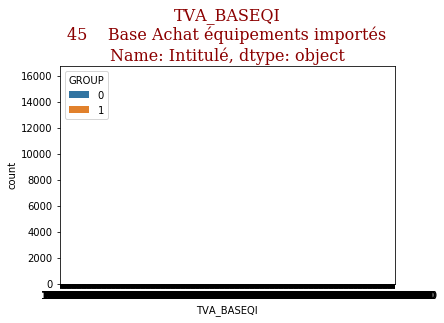


Pour la colonne : TVA_DEDEQI                0
0             0.0
1             NaN
2      94389691.0
3      46614752.0
4      46445624.0
...           ...
1941     103232.0
1942  252208617.0
1943   11883888.0
1944    4858083.0
1945   13795149.0

[1946 rows x 1 columns]


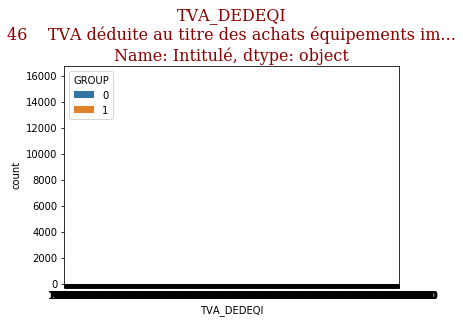


Pour la colonne : TVA_BASAUL                  0
0      1.236080e+05
1      0.000000e+00
2      1.886150e+07
3      9.083122e+06
4      4.564665e+06
...             ...
16953  4.716349e+06
16954  2.136277e+08
16955  7.020714e+07
16956  3.240247e+09
16957  9.816865e+06

[16958 rows x 1 columns]


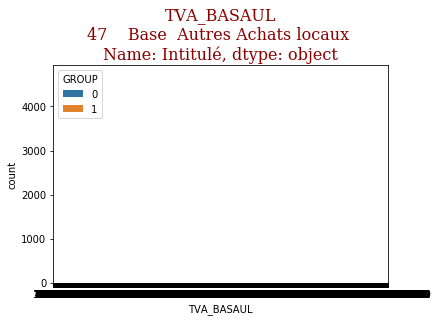


Pour la colonne : TVA_DEDAUL                 0
0           9896.0
1              0.0
2        2209299.0
3        1634962.0
4         821637.0
...            ...
16973     849144.0
16974   19866144.0
16975   12610856.0
16976  583246881.0
16977    1690411.0

[16978 rows x 1 columns]


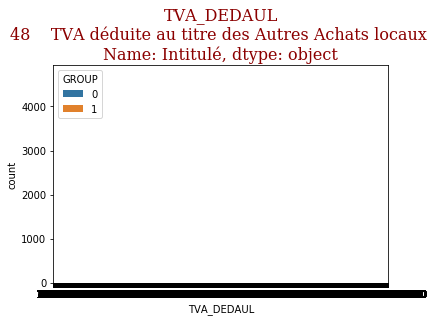


Pour la colonne : TVA_BASAUI                 0
0     0.000000e+00
1              NaN
2     6.146582e+07
3     8.683183e+07
4     3.637110e+08
...            ...
3777  5.004650e+09
3778  6.923810e+05
3779  5.763240e+08
3780  1.373241e+10
3781  5.300121e+07

[3782 rows x 1 columns]


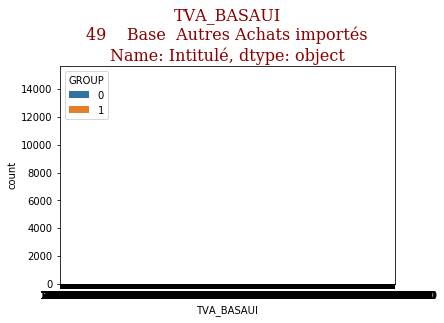


Pour la colonne : TVA_DEDAUI                 0
0     0.000000e+00
1              NaN
2     8.847847e+06
3     1.794298e+07
4     6.543137e+07
...            ...
3780  1.114038e+09
3781  1.016210e+05
3782  1.046833e+08
3783  2.471834e+09
3784  9.528596e+06

[3785 rows x 1 columns]


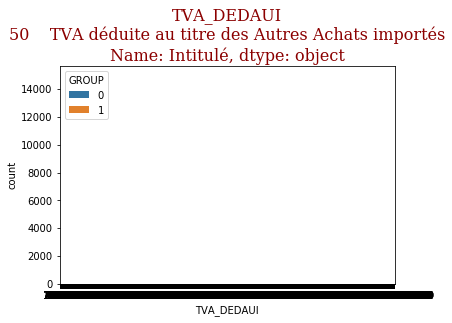


Pour la colonne : TVA_BASRSM                0
0             0.0
1       3566839.0
2             NaN
3     221753217.0
4     474459948.0
...           ...
5665    1439210.0
5666   27247448.0
5667    2269482.0
5668    4320000.0
5669   15982684.0

[5670 rows x 1 columns]


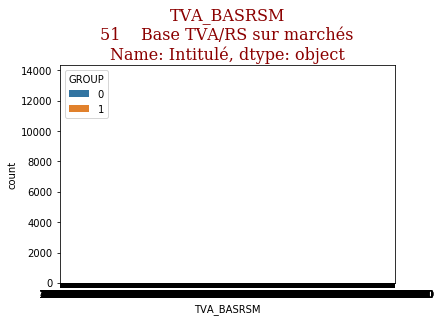


Pour la colonne : TVA_DEDRSM                0
0             0.0
1       1783419.0
2             NaN
3      55438302.0
4     237229974.0
...           ...
5669     359802.0
5670   13623724.0
5671    1134741.0
5672    2160000.0
5673    7991342.0

[5674 rows x 1 columns]


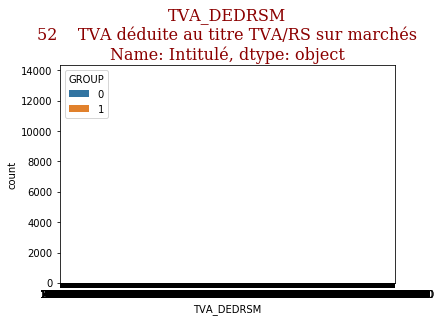


Pour la colonne : TVA_RSNRES               0
0            0.0
1            NaN
2            1.0
3     18930114.0
4       402619.0
..           ...
354     327942.0
355    2217565.0
356  780501922.0
357    1453215.0
358  957657906.0

[359 rows x 1 columns]


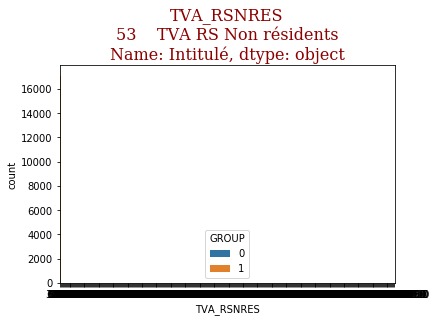


Pour la colonne : TVA_TRSPOR              0
0           0.0
1           NaN
2    96971278.0
3      145290.0
4      330384.0
..          ...
315   1975299.0
316   3439572.0
317  27675751.0
318  12163352.0
319   7461518.0

[320 rows x 1 columns]


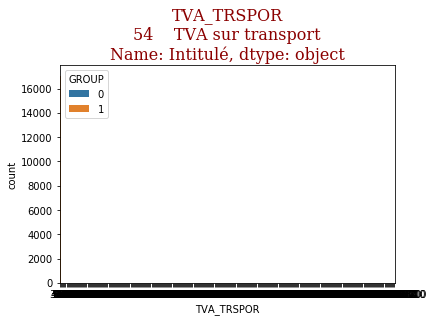


Pour la colonne : TVA_DEDREG               0
0            0.0
1            NaN
2     12398490.0
3        37477.0
4     24575852.0
..           ...
825  127164820.0
826    3375322.0
827    7285702.0
828   12720904.0
829   50697146.0

[830 rows x 1 columns]


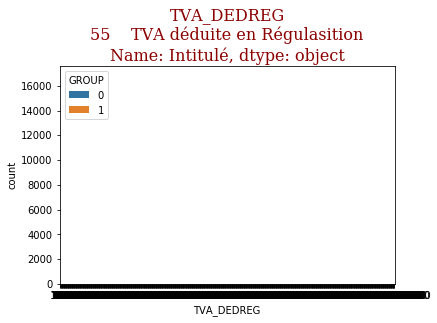


Pour la colonne : TVA_RESTIT                 0
0     0.000000e+00
1              NaN
2     1.588397e+09
3     2.134035e+08
4     2.765522e+08
...            ...
1241  4.755099e+08
1242  1.231954e+08
1243  6.427363e+07
1244  8.966544e+07
1245  8.402044e+07

[1246 rows x 1 columns]


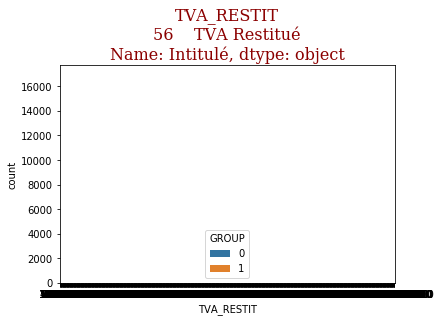


Pour la colonne : TVA_MNTPAY                0
0       6412354.0
1        720000.0
2         31150.0
3             0.0
4        224442.0
...           ...
10543   5215027.0
10544    311128.0
10545    172553.0
10546   1266808.0
10547  12936000.0

[10548 rows x 1 columns]


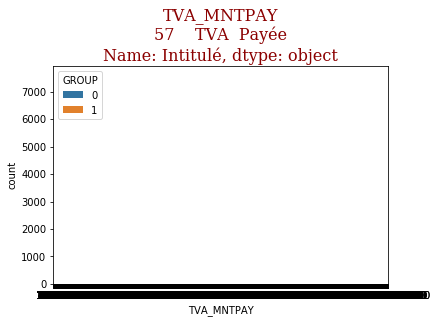


Pour la colonne : TVA_MOIFIN       0
0   12.0
1    NaN
2    5.0
3    4.0
4    3.0
5   11.0
6   10.0
7    8.0
8    9.0
9    1.0
10   2.0
11   7.0
12   6.0


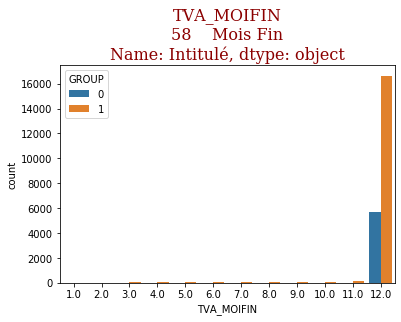


Pour la colonne : TVA_CRDFIN                 0
0              0.0
1         192751.0
2        1680387.0
3      109697513.0
4              NaN
...            ...
12058  579159797.0
12059    5946562.0
12060    3846086.0
12061  503679542.0
12062   23853367.0

[12063 rows x 1 columns]


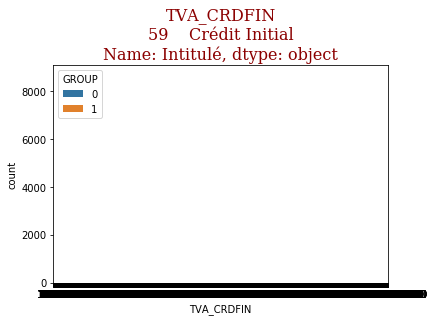


Pour la colonne : TVA_ACHSUS               0
0   0.000000e+00
1            NaN
2   3.119783e+08
3   6.666054e+07
4   2.628100e+07
5   3.992760e+07
6   2.730000e+06
7   5.515969e+07
8   9.007996e+08
9   4.277511e+06
10  2.751073e+08
11  1.106052e+07
12  1.972707e+07
13  2.841623e+08
14  4.199000e+05
15  1.229500e+07
16  3.332000e+03
17  5.376315e+07
18  1.393890e+08
19  2.208181e+08
20  3.575950e+07
21  2.398690e+07
22  8.489400e+07
23  3.927852e+08
24  3.230692e+08
25  1.272480e+07
26  6.951490e+07
27  4.330325e+06
28  1.267571e+08
29  1.708377e+07
30  5.800000e+06
31  2.480805e+07
32  9.500000e+05
33  4.200000e+04
34  2.061691e+09
35  3.024000e+05
36  1.577635e+07
37  1.113000e+07
38  2.340700e+08
39  4.531045e+07
40  1.971210e+06
41  6.669100e+08
42  7.372900e+04
43  2.925228e+08
44  2.155300e+07
45  5.055000e+06
46  7.281780e+05
47  4.161315e+09
48  1.031580e+06
49  2.920785e+06
50  2.107046e+08
51  1.690303e+06
52  1.709303e+08
53  7.218195e+08
54  1.170000e+06
55  3.023553e+08
56

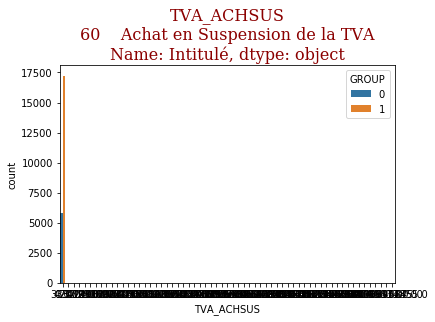


Pour la colonne : TVA_ACHEXO                0
0    0.000000e+00
1             NaN
2    5.249365e+09
3    8.075832e+07
4    5.434764e+07
..            ...
453  2.967321e+08
454  4.788000e+06
455  1.010174e+07
456  5.100000e+05
457  7.723641e+09

[458 rows x 1 columns]


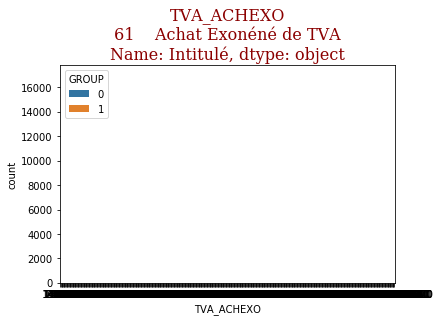


Pour la colonne : TVA_ACHNDD               0
0   0.000000e+00
1            NaN
2   3.119783e+08
3   6.666054e+07
4   2.628100e+07
5   3.992760e+07
6   2.730000e+06
7   5.515969e+07
8   9.007996e+08
9   4.277511e+06
10  2.751073e+08
11  1.106052e+07
12  1.972707e+07
13  2.841623e+08
14  4.199000e+05
15  1.229500e+07
16  3.332000e+03
17  5.376315e+07
18  1.393890e+08
19  2.208181e+08
20  3.575950e+07
21  2.398690e+07
22  8.489400e+07
23  3.927852e+08
24  3.230692e+08
25  1.272480e+07
26  6.951490e+07
27  4.330325e+06
28  1.267571e+08
29  1.708377e+07
30  5.800000e+06
31  2.480805e+07
32  9.500000e+05
33  4.200000e+04
34  2.061691e+09
35  3.024000e+05
36  1.577635e+07
37  1.113000e+07
38  2.340700e+08
39  4.531045e+07
40  1.971210e+06
41  6.669100e+08
42  7.372900e+04
43  2.925228e+08
44  2.155300e+07
45  5.055000e+06
46  7.281780e+05
47  4.161315e+09
48  1.031580e+06
49  2.920785e+06
50  2.107046e+08
51  1.690303e+06
52  1.709303e+08
53  7.218195e+08
54  1.170000e+06
55  3.023553e+08
56

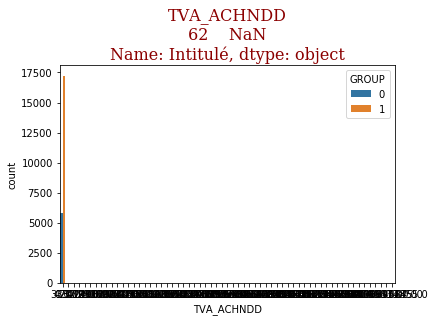


Pour la colonne : TVA_CAFEXP                 0
0     0.000000e+00
1              NaN
2     5.033386e+07
3     7.811132e+09
4     2.998356e+07
...            ...
2573  3.779373e+09
2574  1.546667e+09
2575  4.509731e+09
2576  9.573787e+08
2577  1.258497e+09

[2578 rows x 1 columns]


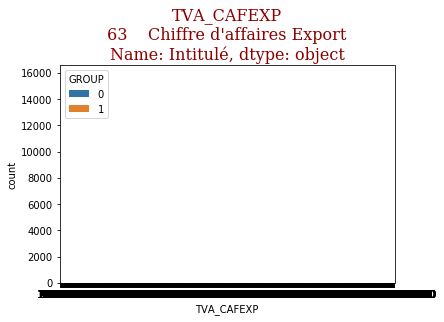


Pour la colonne : TVA_CAFSUS                 0
0     0.000000e+00
1              NaN
2     4.179611e+09
3     3.576153e+06
4     8.410000e+07
...            ...
3235  1.068494e+09
3236  3.316168e+08
3237  9.176673e+07
3238  1.679015e+09
3239  4.933903e+07

[3240 rows x 1 columns]


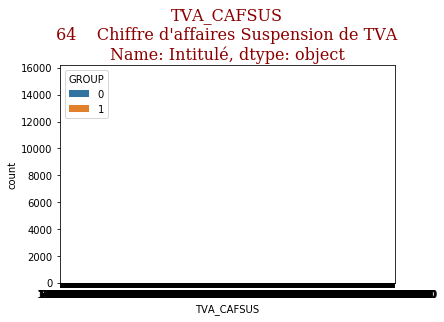


Pour la colonne : TVA_CAFEXO                 0
0     0.000000e+00
1              NaN
2     4.923000e+06
3     1.709075e+07
4     5.060000e+07
...            ...
2760  2.826922e+08
2761  8.490000e+07
2762  9.323126e+09
2763  2.736100e+07
2764  1.194347e+09

[2765 rows x 1 columns]


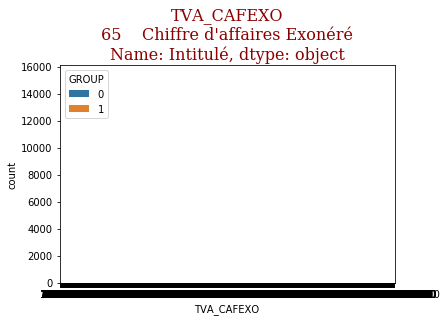


Pour la colonne : TVA_AACHAB              0
0           0.0
1           NaN
2   313850471.0
3      353044.0
4    25305550.0
5    18192105.0
6   573572245.0
7    12582030.0
8     4160000.0
9      349814.0
10   51178000.0
11  279294078.0
12   31467342.0
13  602711821.0
14  128961082.0
15    3400000.0
16   10478249.0
17    5687562.0
18   16878342.0
19     950000.0
20  141348000.0
21    7870680.0
22    2458968.0
23    3624225.0
24    5274933.0
25   24322566.0
26    2683726.0
27     230336.0
28     582975.0


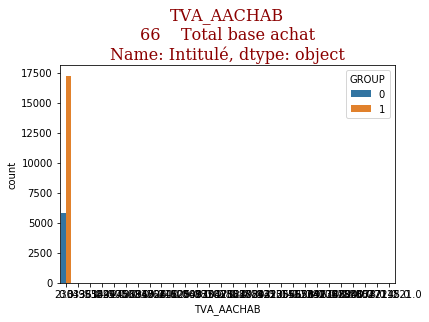


Pour la colonne : TVA_CRDBLQ                0
0    0.000000e+00
1             NaN
2    2.765522e+08
3    2.817852e+07
4    4.388468e+07
5    5.687410e+08
6    2.339162e+07
7    1.151159e+09
8    1.918200e+07
9    2.336445e+07
10   1.521770e+06
11   6.965716e+07
12   1.886923e+09
13   1.251461e+08
14   1.051903e+08
15   9.924415e+08
16   3.702643e+07
17   1.346838e+09
18   1.211158e+07
19   1.577357e+07
20   1.709768e+07
21   5.474537e+07
22   2.241152e+08
23   1.498114e+08
24   5.821656e+08
25   7.187339e+07
26   3.216870e+07
27   1.832142e+07
28   3.775483e+07
29   1.790881e+06
30   1.723201e+07
31   8.620964e+08
32   3.386079e+07
33   1.390004e+08
34   1.281455e+07
35   4.715469e+07
36   3.996636e+06
37   1.197980e+09
38   7.521143e+07
39   2.824810e+07
40   3.803284e+06
41   9.447000e+06
42   1.714070e+07
43   8.115112e+07
44   2.190255e+07
45   2.720005e+08
46   1.431353e+08
47   9.722729e+06
48   1.900056e+08
49   1.791092e+08
50   2.150023e+07
51   1.380976e+09
52   6.206567e+07

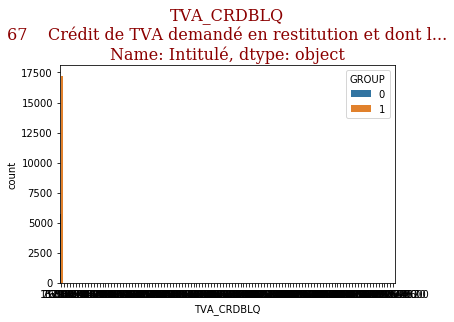


Pour la colonne : TVA_CRDRES                0
0    0.000000e+00
1             NaN
2    2.765522e+08
3    4.226777e+06
4    6.582701e+06
5    3.508742e+06
6    9.859399e+08
7    1.918200e+07
8    2.336445e+07
9    6.965716e+07
10   2.655766e+08
11   1.877191e+07
12   9.734348e+07
13   9.924415e+08
14   2.777939e+07
15   1.134189e+09
16   1.211158e+07
17   1.577357e+07
18   9.855492e+06
19   2.241152e+08
20   2.247171e+07
21   5.546882e+08
22   1.078101e+07
23   3.216870e+07
24   1.832142e+07
25   5.663224e+06
26   2.686320e+05
27   1.723201e+07
28   1.293144e+08
29   3.386079e+07
30   1.390004e+08
31   1.281455e+07
32   4.715469e+07
33   1.005630e+09
34   1.128171e+07
35   4.237215e+06
36   3.803284e+06
37   9.447000e+06
38   1.714070e+07
39   8.115112e+07
40   2.143835e+07
41   1.431353e+08
42   9.722729e+06
43   1.299784e+08
44   1.791092e+08
45   2.150023e+07
46   1.015609e+07
47   9.309850e+06
48   1.052952e+07
49   1.316800e+07
50   4.327659e+07
51   8.679616e+06
52   1.691109e+07

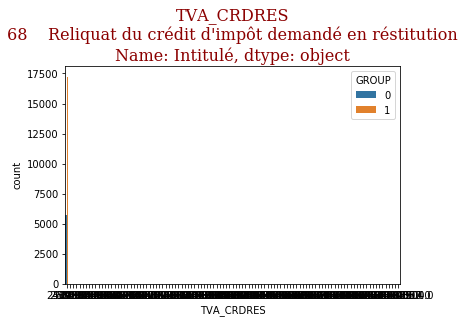


Pour la colonne : TVA_CRDRMP               0
0   0.000000e+00
1            NaN
2   2.765522e+08
3   2.212811e+07
4   3.730198e+07
5   1.151159e+09
6   1.985978e+07
7   6.382449e+08
8   7.929648e+09
9   6.311418e+08
10  4.696391e+07
11  1.127510e+08
12  1.488114e+09
13  7.393671e+08
14  5.129305e+07
15  1.304629e+08
16  1.904979e+08
17  3.430894e+08
18  3.643517e+09
19  8.650466e+09
20  5.938089e+09
21  1.442325e+09
22  1.922063e+08
23  1.092254e+09
24  3.641294e+07
25  2.985684e+08
26  4.396692e+09
27  1.957391e+09
28  1.047024e+08
29  5.154583e+09
30  4.935292e+09
31  4.802177e+07
32  5.545254e+08
33  2.060370e+09
34  1.030368e+08
35  1.070598e+09
36  1.863116e+07
37  3.934002e+06
38  8.075238e+08
39  1.804209e+08
40  5.275582e+07
41  1.193345e+08
42  8.068720e+08
43  5.596400e+07
44  1.431944e+07
45  1.086766e+09
46  7.278719e+08
47  9.091943e+07
48  3.456884e+09
49  6.678994e+07
50  3.958726e+09
51  1.468043e+09
52  1.930425e+09
53  1.042262e+08
54  7.830946e+07
55  3.501888e+07
56

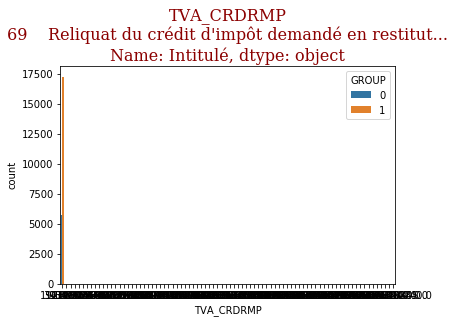


Pour la colonne : TVA_CRDREP     0
0  0.0
1  NaN


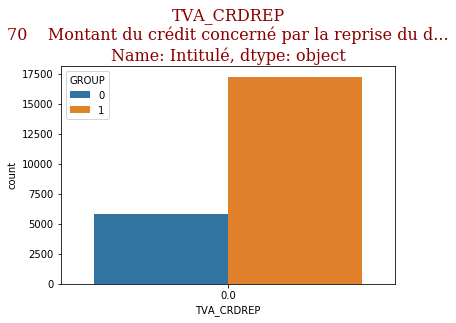


Pour la colonne : TVA_CRDRMC                0
0    0.000000e+00
1             NaN
2    2.765522e+08
3    2.395174e+07
4    2.212811e+07
5    7.460395e+07
6    5.687410e+08
7    1.988288e+07
8    1.316378e+09
9    1.985978e+07
10   1.621346e+09
11   7.446191e+08
12   7.929648e+09
13   6.389887e+08
14   4.696391e+07
15   1.219980e+08
16   1.700763e+09
17   7.393671e+08
18   5.853524e+07
19   5.474537e+07
20   1.304629e+08
21   1.904979e+08
22   3.430894e+08
23   1.273397e+08
24   3.670995e+09
25   8.650466e+09
26   6.109238e+07
27   5.938089e+09
28   1.442325e+09
29   1.922063e+08
30   1.092254e+09
31   3.641294e+07
32   3.209161e+07
33   1.522249e+06
34   2.985684e+08
35   5.129474e+09
36   1.957391e+09
37   1.047024e+08
38   3.996636e+06
39   5.346932e+09
40   4.935292e+09
41   6.392971e+07
42   7.203266e+07
43   5.545254e+08
44   2.060370e+09
45   1.030368e+08
46   1.070598e+09
47   1.909536e+07
48   3.934002e+06
49   2.720005e+08
50   8.675511e+08
51   1.804209e+08
52   1.370820e+09

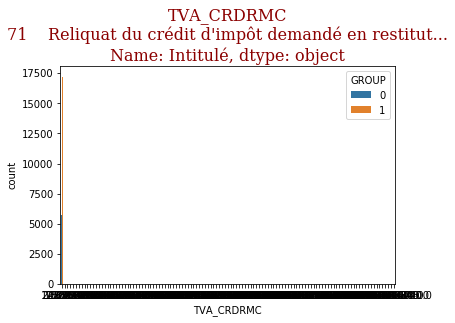


Pour la colonne : TVA_MACHN                0
0    0.000000e+00
1             NaN
2    1.741690e+07
3    9.309700e+05
4    1.807148e+07
5    1.399974e+06
6    7.746413e+08
7    2.085146e+08
8    9.053000e+05
9    4.946740e+05
10   3.947000e+05
11   1.717679e+07
12   1.740473e+07
13   1.958239e+08
14   6.667500e+05
15   4.090000e+04
16   4.024202e+06
17   1.846108e+07
18   3.458152e+07
19   7.572365e+08
20   7.725118e+08
21   1.600000e+05
22   3.374202e+06
23   2.082867e+08
24   1.911099e+08
25   2.350720e+06
26   8.937351e+06
27   1.912728e+06
28   2.319722e+06
29   3.528300e+06
30   4.714000e+06
31   1.726057e+07
32   3.050871e+06
33   2.211873e+07
34   1.217000e+04
35   7.505300e+05
36   1.840000e+06
37   2.634208e+07
38   1.823314e+07
39   5.380750e+06
40   5.143000e+05
41   9.440170e+06
42   1.333500e+06
43   1.056350e+06
44   1.911937e+08
45   2.158640e+06
46   1.200829e+06
47   2.058270e+06
48   3.423955e+08
49   7.573203e+08
50   3.225022e+06
51   3.435359e+07
52   1.514473e+09


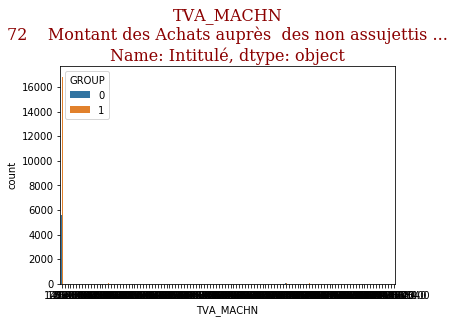


Pour la colonne : TVA_MCESQ                0
0    0.000000e+00
1             NaN
2    1.349238e+09
3    3.010550e+07
4    1.083214e+08
..            ...
706  3.514252e+09
707  1.343379e+08
708  3.899204e+09
709  1.247031e+08
710  1.303829e+06

[711 rows x 1 columns]


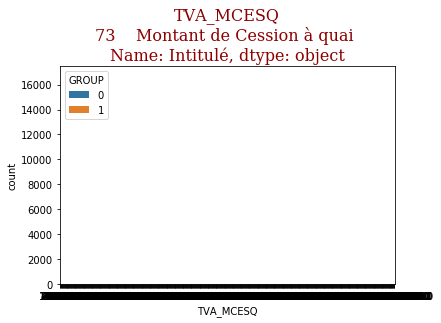


Pour la colonne : TVA_MTVLSM               0
0   0.000000e+00
1            NaN
2   2.501000e+05
3   1.385825e+06
4   4.600000e+05
5   1.388573e+08
6   1.276281e+08
7   1.840000e+06
8   2.861750e+06
9   5.723500e+05
10  2.771650e+06
11  1.635925e+06
12  1.391074e+08
13  3.814035e+06
14  2.552563e+08
15  1.144700e+06
16  4.000000e+00
17  4.075461e+08
18  1.278782e+08
19  2.124657e+08
20  2.844842e+10
21  9.200000e+05
22  1.389193e+09
23  3.000000e+00
24  2.777147e+08
25  1.717050e+06
26  1.025119e+09
27  7.077970e+05
28  1.845825e+06
29  5.002000e+05
30  8.224500e+05
31  3.255699e+06
32  5.151150e+06
33  1.108660e+07
34  1.533000e+06


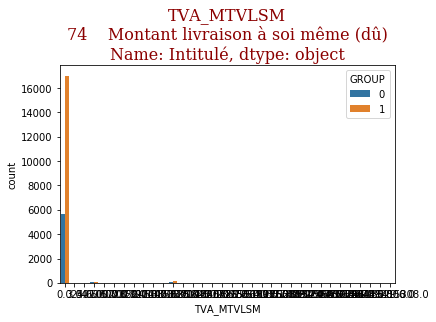


Pour la colonne : TVA_TXVLSM               0
0   0.000000e+00
1            NaN
2   3.001200e+04
3   2.494480e+05
4   3.450000e+04
5   2.499432e+07
6   2.297306e+07
7   1.380000e+05
8   2.146300e+05
9   4.292600e+04
10  4.988960e+05
11  2.794600e+05
12  2.502433e+07
13  6.865260e+05
14  4.594613e+07
15  8.585200e+04
16  2.445277e+07
17  2.300308e+07
18  4.036848e+07
19  5.120715e+09
20  6.900000e+04
21  2.500547e+08
22  4.998864e+07
23  1.287780e+05
24  1.845214e+08
25  1.090600e+05
26  2.839480e+05
27  6.002400e+04
28  7.293800e+04
29  2.660760e+05
30  3.863340e+05
31  1.995584e+06
32  2.759400e+05


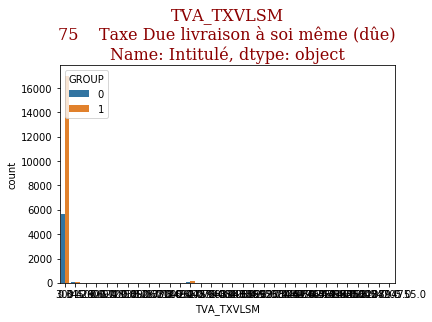


Pour la colonne : TVA_MTALSM               0
0   0.000000e+00
1            NaN
2   9.872780e+05
3   2.373103e+06
4   5.567970e+05
5   1.388573e+08
6   3.703757e+06
7   1.385825e+06
8   1.398446e+08
9   1.544075e+06
10  5.089582e+06
11  2.771650e+06
12  3.469950e+07
13  4.260554e+06
14  1.025805e+07
15  1.113594e+06
16  1.491030e+07
17  5.923668e+06
18  5.364000e+06
19  2.124657e+08
20  2.844842e+10
21  2.961834e+06
22  1.389193e+09
23  1.809074e+06
24  6.328893e+07
25  2.777147e+08
26  7.407514e+06
27  3.060000e+05
28  1.025119e+09
29  3.640000e+05
30  1.108660e+07


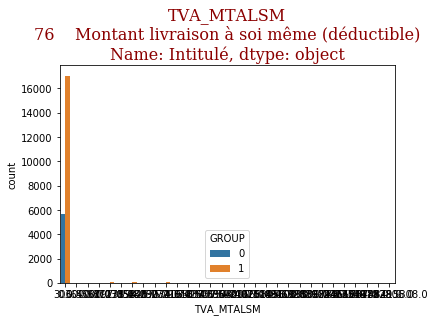


Pour la colonne : TVA_TXALSM               0
0   0.000000e+00
1            NaN
2   1.777100e+05
3   4.271580e+05
4   3.705300e+04
5   2.499432e+07
6   6.244080e+05
7   2.494480e+05
8   2.517203e+07
9   2.147630e+05
10  8.738560e+05
11  4.988960e+05
12  3.801175e+06
13  6.614610e+05
14  1.846449e+06
15  7.410600e+04
16  1.656623e+06
17  1.066260e+06
18  6.030000e+05
19  4.036848e+07
20  5.120715e+09
21  5.331300e+05
22  2.500547e+08
23  2.178160e+05
24  4.430225e+06
25  4.998864e+07
26  1.248816e+06
27  3.385000e+04
28  1.845214e+08
29  2.600000e+04
30  1.995584e+06


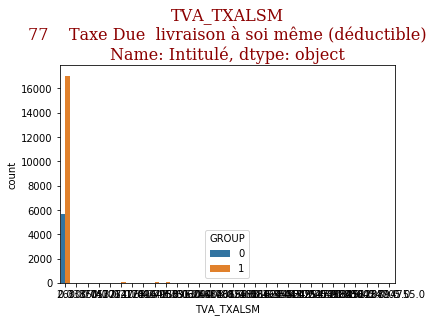


Pour la colonne : TVA_MTORDTVA               0
0   0.000000e+00
1            NaN
2   1.588397e+09
3   9.442936e+06
4   4.141616e+09
5   3.174754e+09
6   1.902437e+10
7   1.605325e+09
8   1.799356e+08
9   1.046357e+09
10  6.653130e+08
11  2.923672e+08
12  7.278719e+08
13  6.835698e+08
14  1.327599e+09
15  1.856664e+07
16  9.379391e+08
17  4.049696e+08
18  2.400458e+09
19  3.131944e+08
20  2.011075e+08
21  1.660231e+08
22  2.670671e+09
23  1.441943e+08
24  1.147545e+08


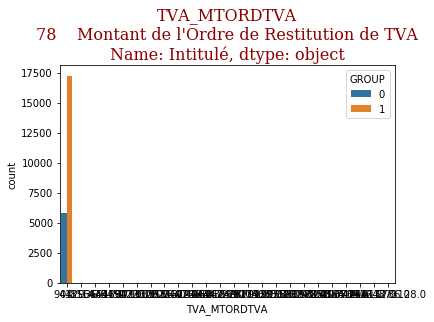


Pour la colonne : TVA_MTDJRTVA                0
0    0.000000e+00
1             NaN
2    6.983018e+07
3    2.049718e+08
4    5.582926e+08
..            ...
196  9.423844e+06
197  9.551050e+08
198  3.910769e+09
199  5.467299e+09
200  1.384776e+07

[201 rows x 1 columns]


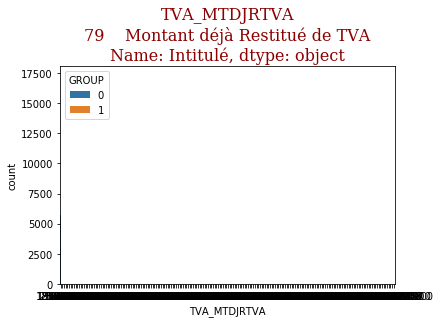


Pour la colonne : TVA_MTORDTAX     0
0  0.0
1  NaN


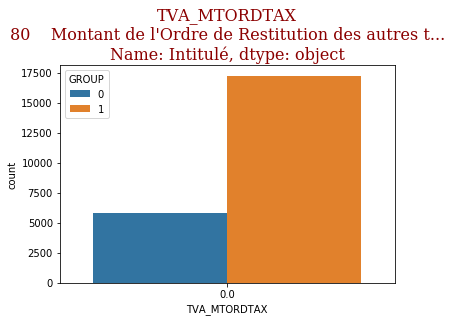


Pour la colonne : TVA_MTDJRTAX              0
0  0.000000e+00
1           NaN
2  2.485592e+08
3  1.068198e+09


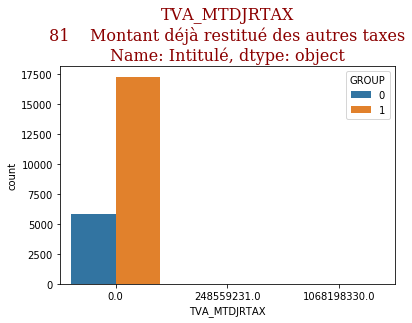


Pour la colonne : TVA_MTRESTAX              0
0  0.000000e+00
1           NaN
2  2.485592e+08
3  1.068198e+09


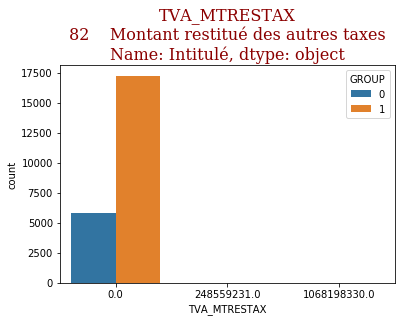


Pour la colonne : TVA_CA072018                0
0    0.000000e+00
1             NaN
2    3.934275e+07
3    2.677667e+08
4    1.366127e+08
5    8.920000e+07
6    3.562472e+09
7    7.664954e+07
8    9.354286e+07
9    3.132711e+07
10   1.688785e+07
11   5.252337e+07
12   2.288083e+08
13   7.159250e+07
14   1.221705e+08
15   7.455825e+09
16   1.909440e+06
17   3.831776e+07
18   4.259298e+07
19   4.493214e+07
20   4.995463e+08
21   3.814297e+08
22   1.870561e+07
23   5.281880e+09
24   4.299067e+06
25   6.595631e+07
26   9.796951e+09
27   4.017780e+05
28   1.176812e+09
29   6.750452e+07
30   8.859817e+06
31   9.491255e+08
32   5.653271e+07
33   2.469568e+08
34   6.335000e+06
35   3.664037e+06
36   4.874707e+08
37   4.005816e+09
38   6.517197e+07
39   2.321637e+06
40   1.682240e+05
41   1.501000e+07
42   2.121668e+08
43   1.299050e+08
44   6.649316e+08
45   1.389150e+05
46   1.024404e+08
47   1.153071e+07
48   2.231536e+10
49   2.481592e+07
50   6.495325e+07
51   5.600000e+07
52   1.892939e+

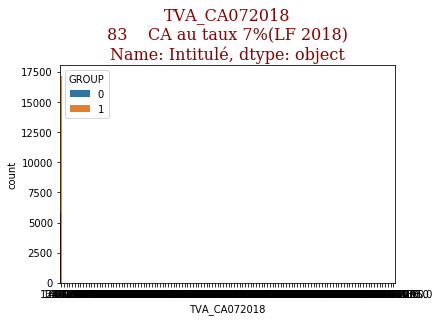


Pour la colonne : TVA_CA132018               0
0   0.000000e+00
1            NaN
2   2.130000e+07
3   3.090290e+05
4   6.685674e+08
5   6.307230e+05
6   3.800000e+05
7   4.948280e+05
8   1.422550e+08
9   1.640000e+07
10  1.548677e+07
11  1.206781e+08
12  5.884953e+06
13  9.889701e+06
14  4.009446e+06
15  2.311239e+07
16  2.758682e+08
17  1.525364e+07
18  7.367779e+07
19  5.799642e+08
20  1.962161e+09
21  8.325000e+07
22  3.031232e+07
23  2.035398e+06
24  5.388124e+08
25  6.446500e+07
26  6.315752e+08
27  2.595000e+07
28  2.520000e+07
29  1.378233e+07
30  1.026549e+08
31  1.783140e+07
32  1.000000e+06
33  2.281563e+07
34  6.728453e+06
35  7.260752e+07
36  7.593372e+06
37  1.384961e+08
38  2.854560e+06
39  1.317690e+05
40  8.495028e+06
41  1.340000e+07
42  4.424780e+05
43  7.171415e+06
44  7.900000e+06
45  1.360602e+07
46  1.005707e+09
47  4.103311e+08
48  1.404180e+07
49  3.943210e+09
50  8.950000e+06


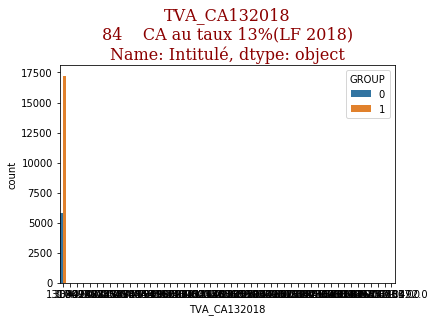


Pour la colonne : TVA_CA192018                0
0    0.000000e+00
1             NaN
2    1.709370e+07
3    4.976348e+09
4    1.756786e+08
..            ...
180  5.647958e+08
181  2.884043e+08
182  1.547066e+09
183  7.355297e+08
184  8.671730e+06

[185 rows x 1 columns]


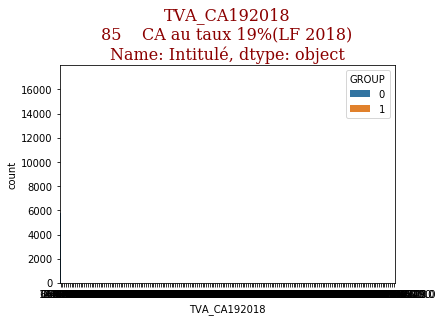

['AX1_BRTIMP' 'AX2_HONORA' 'AX2_LOYERS' 'AX3_REVCAP' 'AX5_MNTMAR']

Pour la colonne : AX1_BRTIMP               0
0            0.0
1            NaN
2     71054837.0
3     62703967.0
4    214683000.0
..           ...
383    8412398.0
384    1858326.0
385   18666764.0
386   22867992.0
387    6084024.0

[388 rows x 1 columns]


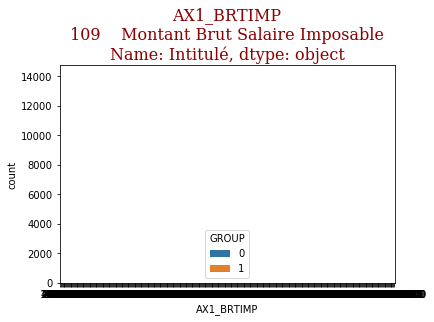


Pour la colonne : AX2_HONORA                0
0      58912000.0
1       3425295.0
2             NaN
3      21604529.0
4             0.0
...           ...
5867   50620491.0
5868    3297641.0
5869   22937500.0
5870    4560000.0
5871  120736000.0

[5872 rows x 1 columns]


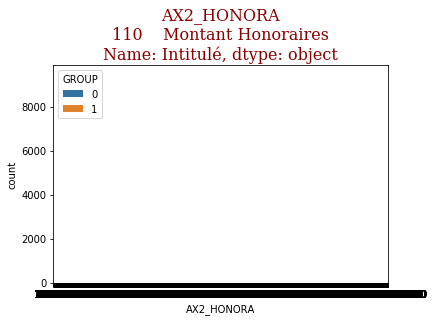


Pour la colonne : AX2_LOYERS                0
0             0.0
1             NaN
2     700000000.0
3     149354534.0
4       4589687.0
...           ...
1391   34436253.0
1392   56640800.0
1393   10483600.0
1394   18352541.0
1395   32188293.0

[1396 rows x 1 columns]


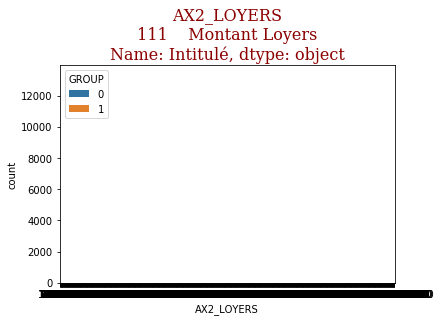


Pour la colonne : AX3_REVCAP               0
0      2530630.0
1     10924985.0
2            NaN
3            0.0
4      1219594.0
...          ...
5393    456425.0
5394   9994275.0
5395  16128295.0
5396   8656338.0
5397    419726.0

[5398 rows x 1 columns]


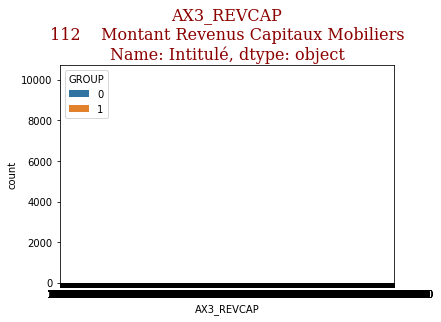


Pour la colonne : AX5_MNTMAR                  0
0      0.000000e+00
1               NaN
2      9.232176e+07
3      8.960400e+06
4      7.416540e+07
...             ...
10836  2.043319e+07
10837  5.895192e+09
10838  7.377820e+05
10839  2.355379e+08
10840  1.301083e+09

[10841 rows x 1 columns]


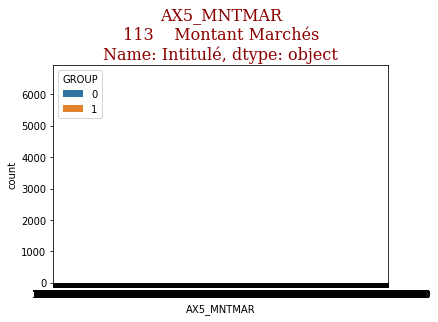

['ADB_MNTORD']

Pour la colonne : ADB_MNTORD                 0
0              NaN
1     3.444275e+07
2     1.540633e+09
3     3.279973e+08
4     4.035785e+07
...            ...
6122  3.500116e+07
6123  4.781039e+09
6124  1.288820e+06
6125  3.652000e+07
6126  1.167519e+06

[6127 rows x 1 columns]


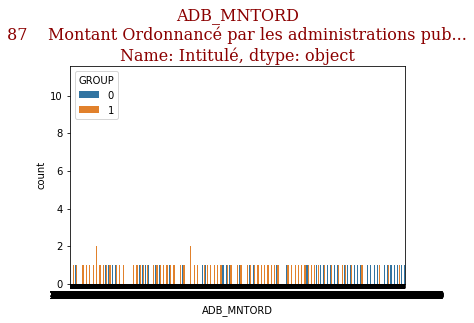

['SND_MNTPRD_I' 'SND_MNTTVA_I' 'SND_MNTDRC_I' 'SND_MNTAVA_I'
 'SND_MNTTAX_I' 'SND_MNTPAY_I' 'SND_MNTAIR_I']

Pour la colonne : SND_MNTPRD_I                 0
0              NaN
1     1.337878e+08
2     2.164410e+08
3     1.225413e+10
4     9.014258e+08
...            ...
4364  6.016982e+07
4365  6.435621e+09
4366  1.226286e+09
4367  1.318238e+10
4368  1.322304e+09

[4369 rows x 1 columns]


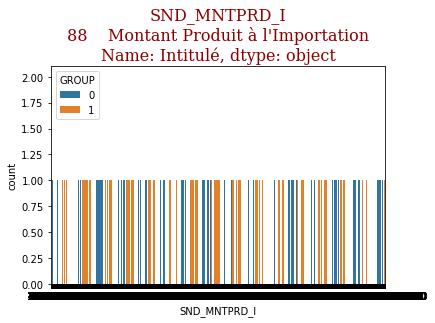


Pour la colonne : SND_MNTTVA_I                 0
0              NaN
1     3.827977e+07
2     6.428044e+07
3     2.227577e+09
4     1.639832e+08
...            ...
4040  1.083057e+07
4041  1.584483e+09
4042  2.233711e+08
4043  2.385316e+09
4044  2.526304e+08

[4045 rows x 1 columns]


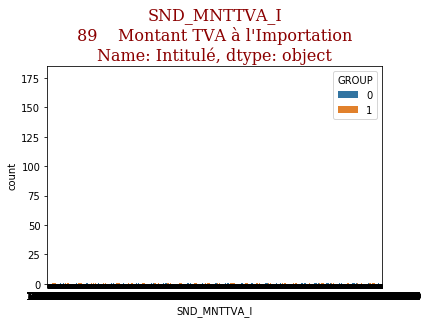


Pour la colonne : SND_MNTDRC_I               0
0            NaN
1       359340.0
2       272665.0
3         9240.0
4            0.0
..           ...
812      23220.0
813       6996.0
814  466055641.0
815     132601.0
816    1965479.0

[817 rows x 1 columns]


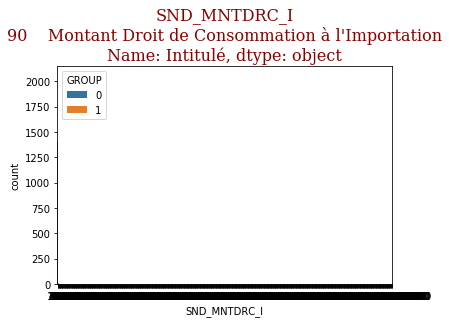


Pour la colonne : SND_MNTAVA_I     0
0  NaN
1  0.0


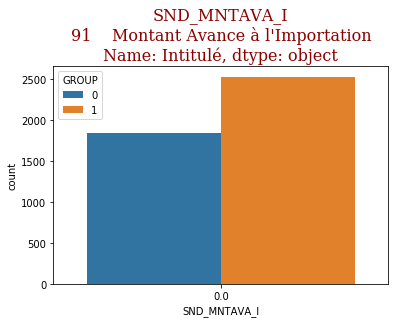


Pour la colonne : SND_MNTTAX_I                0
0             NaN
1      41579049.0
2      73727432.0
3     577122433.0
4     127060141.0
...           ...
4175     324917.0
4176  216700696.0
4177   21678237.0
4178  143271729.0
4179   89303793.0

[4180 rows x 1 columns]


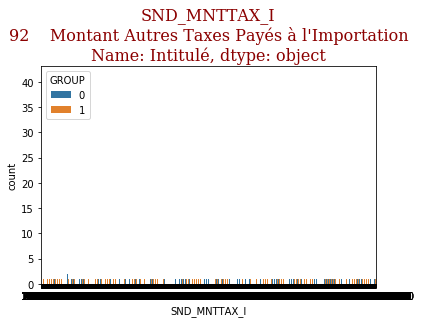


Pour la colonne : SND_MNTPAY_I                 0
0              NaN
1     8.021816e+07
2     1.382805e+08
3     2.804708e+09
4     2.910433e+08
...            ...
4196  1.115548e+07
4197  2.267240e+09
4198  2.451819e+08
4199  2.528588e+09
4200  3.438996e+08

[4201 rows x 1 columns]


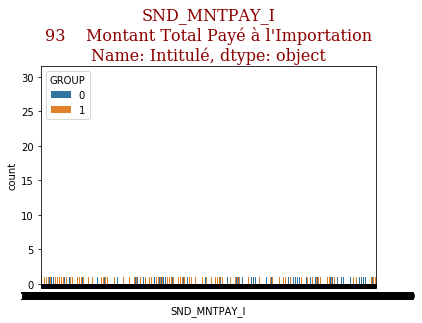


Pour la colonne : SND_MNTAIR_I                 0
0              NaN
1     4.743859e+07
2     1.128257e+09
3     1.108068e+07
4     6.591800e+04
...            ...
1964  1.060800e+07
1965  1.095966e+06
1966  8.692653e+09
1967  9.146184e+07
1968  3.857872e+06

[1969 rows x 1 columns]


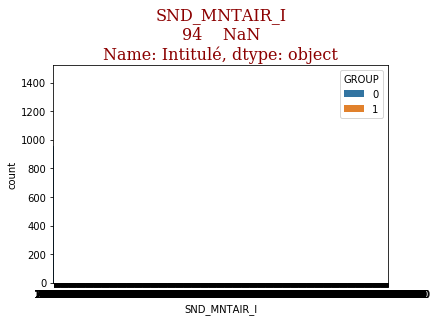

['SND_MNTPRD_A' 'SND_MNTTVA_A' 'SND_MNTDRC_A' 'SND_MNTAVA_A'
 'SND_MNTTAX_A' 'SND_MNTPAY_A' 'SND_MNTAIR_A']

Pour la colonne : SND_MNTPRD_A                 0
0              NaN
1     4.000000e+06
2     1.274057e+10
3     3.710825e+09
4     7.000000e+06
...            ...
2428  2.517774e+09
2429  4.275936e+11
2430  3.235470e+09
2431  4.856656e+07
2432  1.654751e+06

[2433 rows x 1 columns]


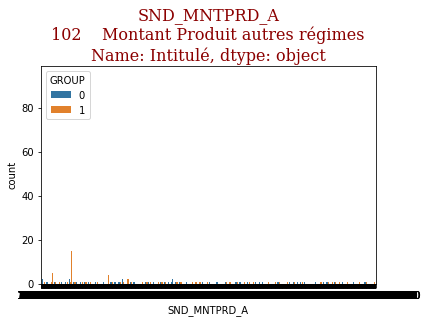


Pour la colonne : SND_MNTTVA_A               0
0            NaN
1            0.0
2     25503375.0
3       133886.0
4       599437.0
..           ...
309       3144.0
310    3106273.0
311     857644.0
312  104748902.0
313    2366906.0

[314 rows x 1 columns]


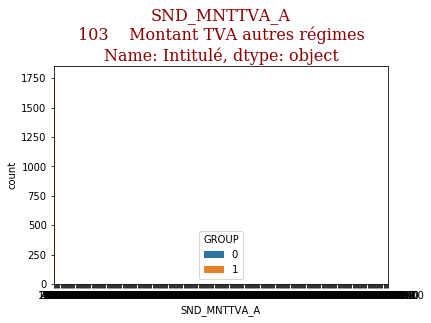


Pour la colonne : SND_MNTDRC_A               0
0            NaN
1   0.000000e+00
2   5.416000e+03
3   2.571695e+08
4   7.931884e+08
5   6.074122e+06
6   6.000000e+01
7   4.690890e+05
8   1.534075e+06
9   2.206092e+09
10  9.500000e+01
11  9.856710e+05
12  1.613439e+09
13  2.532000e+04


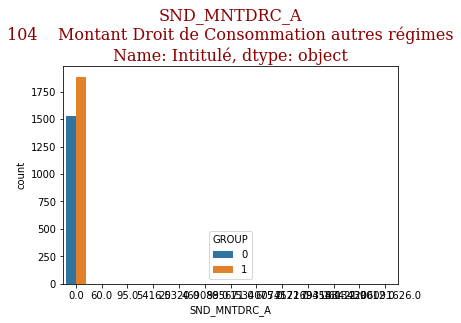


Pour la colonne : SND_MNTAVA_A     0
0  NaN
1  0.0


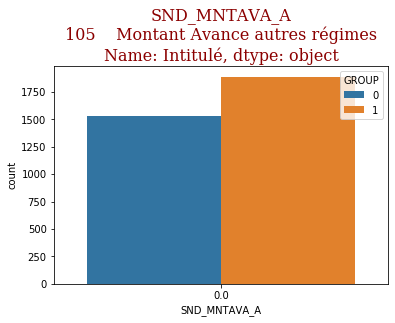


Pour la colonne : SND_MNTTAX_A              0
0           NaN
1       20000.0
2     6449830.0
3       40000.0
4     2670000.0
..          ...
681   2800000.0
682  14372600.0
683  10400000.0
684   1420000.0
685  18240000.0

[686 rows x 1 columns]


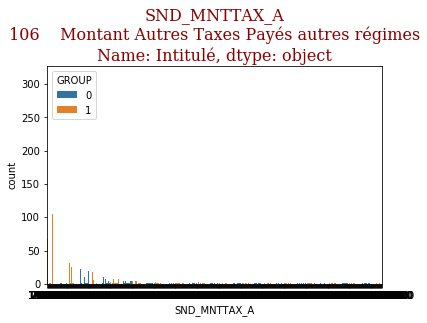


Pour la colonne : SND_MNTPAY_A               0
0            NaN
1        20000.0
2     31953205.0
3        40000.0
4      2670000.0
..           ...
727    2800000.0
728  119146822.0
729   10400000.0
730    3786906.0
731   18240000.0

[732 rows x 1 columns]


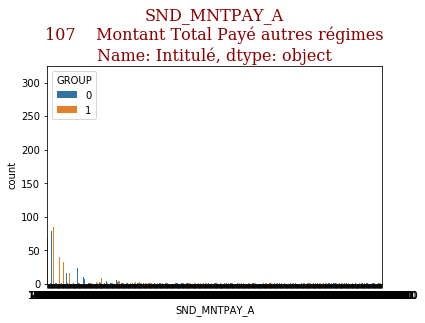


Pour la colonne : SND_MNTAIR_A             0
0          NaN
1          0.0
2    1188724.0
3    1741167.0
4    1183612.0
5     928194.0
6      12208.0
7   88435547.0
8   65733089.0
9      15221.0
10   2241396.0
11    180422.0
12       288.0
13     96216.0
14     73645.0
15    348057.0
16   6604189.0
17     10638.0
18     37548.0
19    172408.0
20   4472540.0
21  14479443.0
22     28116.0
23    107545.0
24       392.0


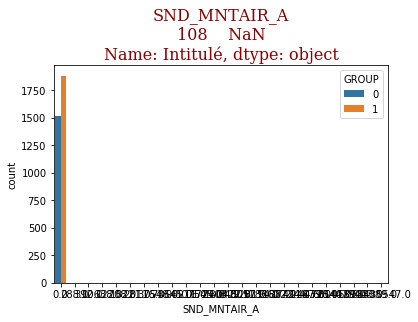

['FAC_MNTPRI_C' 'FAC_MFODEC_C' 'FAC_MNTDCO_C' 'FAC_MNTTVA_C']

Pour la colonne : FAC_MNTPRI_C                0
0             NaN
1     169288910.0
2       2398725.0
3      42372881.0
4      22995972.0
...           ...
2351   10828308.0
2352    1060000.0
2353  161127608.0
2354  188695818.0
2355   14838510.0

[2356 rows x 1 columns]


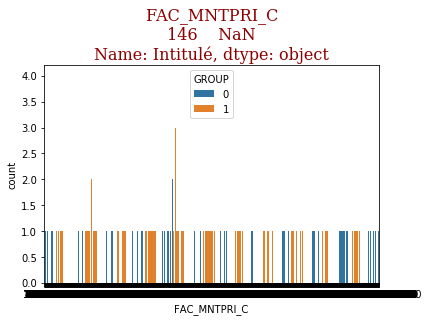


Pour la colonne : FAC_MFODEC_C              0
0           NaN
1           0.0
2     4292488.0
3     5653378.0
4      992514.0
..          ...
562   4505947.0
563   3293584.0
564   1010375.0
565    971324.0
566  12503174.0

[567 rows x 1 columns]


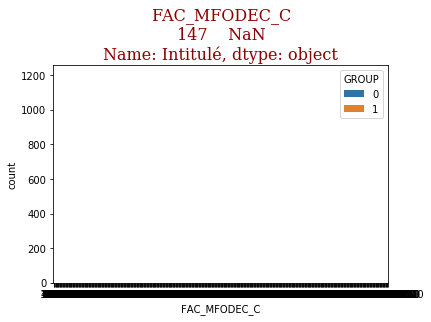


Pour la colonne : FAC_MNTDCO_C             0
0          NaN
1          0.0
2    5129248.0
3        400.0
4       1354.0
5     216980.0
6     206150.0
7      61752.0
8      16335.0
9      18000.0
10      1190.0
11   8296654.0
12     31148.0
13   4469880.0
14      4406.0
15    161663.0
16      1000.0
17    591345.0
18      2500.0
19     38430.0
20    357953.0
21      2235.0
22     26141.0
23   1845053.0
24     96880.0
25  26145000.0
26      1200.0
27   9996934.0
28     59460.0
29     25908.0
30    310238.0
31      6000.0
32     89910.0
33     62080.0
34       170.0
35    297108.0
36       339.0
37  13860000.0
38    139060.0


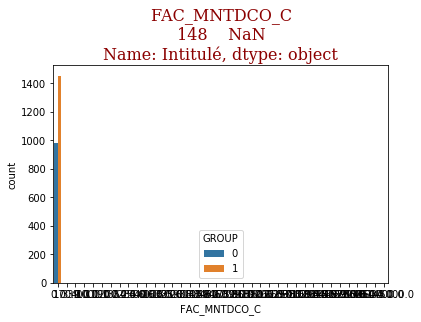


Pour la colonne : FAC_MNTTVA_C               0
0            NaN
1     30472006.0
2       431767.0
3      7627119.0
4      4139280.0
...          ...
2309   1949100.0
2310    190800.0
2311  29002968.0
2312  36242021.0
2313   2670930.0

[2314 rows x 1 columns]


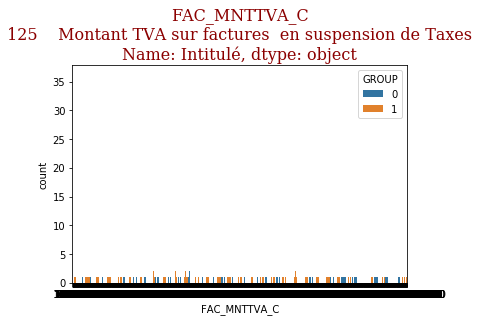

['FAC_MNTPRI_F' 'FAC_MFODEC_F' 'FAC_MNTDCO_F' 'FAC_MNTTVA_F']

Pour la colonne : FAC_MNTPRI_F                 0
0              NaN
1     1.071063e+07
2     4.310032e+09
3     7.000000e+05
4     3.208046e+08
...            ...
2103  7.581613e+07
2104  3.397752e+07
2105  3.589778e+08
2106  2.637038e+09
2107  5.314903e+07

[2108 rows x 1 columns]


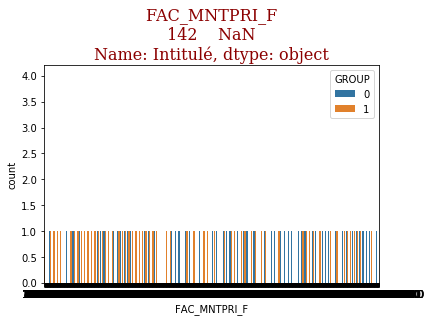


Pour la colonne : FAC_MFODEC_F              0
0           NaN
1           0.0
2    43100323.0
3     3208046.0
4      527300.0
..          ...
387   2823133.0
388     90412.0
389   7798606.0
390   8940469.0
391    339774.0

[392 rows x 1 columns]


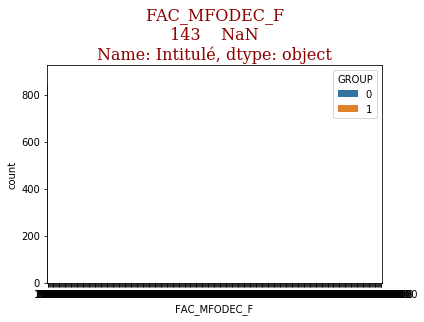


Pour la colonne : FAC_MNTDCO_F              0
0           NaN
1           0.0
2   175068942.0
3           1.0
4   164934374.0
5      101210.0
6        1000.0
7       18000.0
8    11288730.0
9     1995604.0
10  152991161.0
11    2016670.0
12         18.0
13     918000.0
14      54700.0
15      77045.0


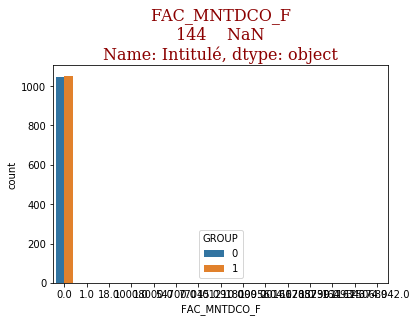


Pour la colonne : FAC_MNTTVA_F                0
0             NaN
1       1927912.0
2     783563863.0
3        126000.0
4      58322274.0
...           ...
2062   13646904.0
2063    5646831.0
2064   64615996.0
2065  474666901.0
2066    9566825.0

[2067 rows x 1 columns]


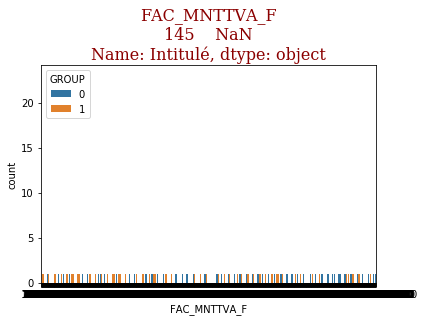

['SND_MNTPRD_E' 'SND_MNTTVA_E' 'SND_MNTDRC_E' 'SND_MNTAVA_E'
 'SND_MNTTAX_E' 'SND_MNTPAY_E' 'SND_MNTAIR_E']

Pour la colonne : SND_MNTPRD_E                 0
0              NaN
1     1.993638e+08
2     2.851018e+09
3     1.769860e+07
4     2.875000e+07
...            ...
1439  6.326254e+09
1440  9.559550e+08
1441  8.813881e+09
1442  4.399868e+07
1443  3.698173e+07

[1444 rows x 1 columns]


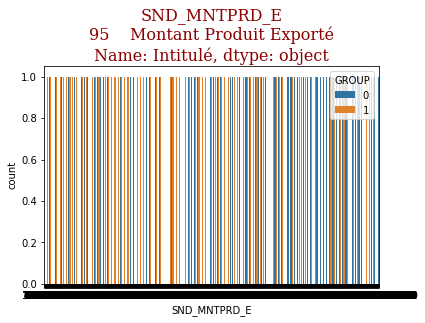


Pour la colonne : SND_MNTTVA_E     0
0  NaN
1  0.0


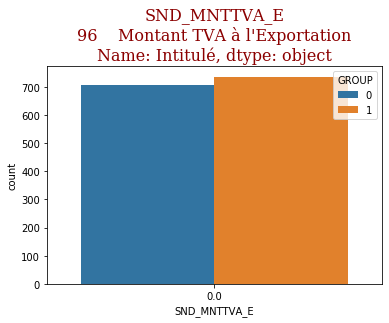


Pour la colonne : SND_MNTDRC_E     0
0  NaN
1  0.0


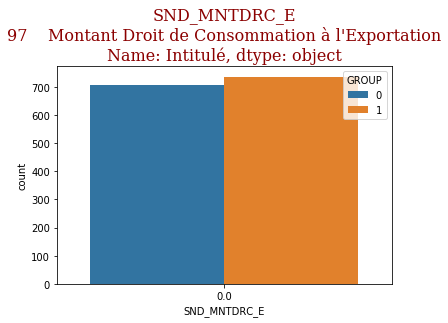


Pour la colonne : SND_MNTAVA_E     0
0  NaN
1  0.0


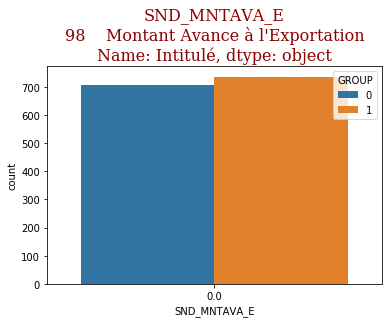


Pour la colonne : SND_MNTTAX_E              0
0           NaN
1           0.0
2    17930209.0
3   274271000.0
4    22034013.0
5   133022117.0
6    13215321.0
7    16575014.0
8    71505885.0
9    78545937.0
10   11567137.0
11   71394787.0
12    1836279.0
13     663823.0
14  264755600.0
15    4070660.0
16      25466.0
17    1473067.0
18   30449019.0
19   94259324.0
20  453656000.0
21   23240000.0
22    6531386.0
23    1953473.0
24   42832443.0
25  182298534.0
26   13998538.0
27    1740502.0
28  826592900.0
29  107988645.0
30   17638109.0
31   87297471.0
32   22746826.0
33  103881272.0
34    3441718.0
35   64070038.0
36  579541500.0
37      98113.0
38   48875652.0
39  343631795.0
40  196145801.0
41   32290785.0
42   54238972.0
43  250446000.0
44    6472152.0
45    3723791.0
46   75148027.0
47      88410.0
48   34185804.0
49   71996933.0
50   15015959.0
51  150565984.0
52  157738803.0
53     953435.0
54     198018.0
55   38523576.0
56   46521506.0
57  117810000.0
58   24960000.0
59  24851

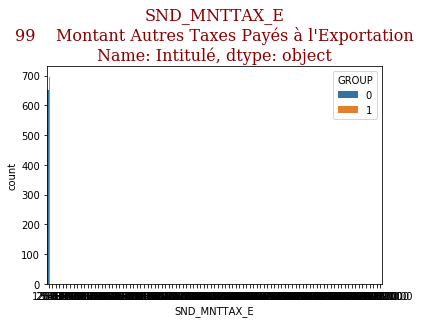


Pour la colonne : SND_MNTPAY_E              0
0           NaN
1           0.0
2    17930209.0
3   274271000.0
4    22034013.0
5   133022117.0
6    13215321.0
7    16575014.0
8    71505885.0
9    78545937.0
10   11567137.0
11   71394787.0
12    1836279.0
13     663823.0
14  264755600.0
15    4070660.0
16      25466.0
17    1473067.0
18   30449019.0
19   94259324.0
20  453656000.0
21   23240000.0
22    6531386.0
23    1953473.0
24   42832443.0
25  182298534.0
26   13998538.0
27    1740502.0
28  826592900.0
29  107988645.0
30   17638109.0
31   87297471.0
32   22746826.0
33  103881272.0
34    3441718.0
35   64070038.0
36  579541500.0
37      98113.0
38   48875652.0
39  343631795.0
40  196145801.0
41   32290785.0
42   54238972.0
43  250446000.0
44    6472152.0
45    3723791.0
46   75148027.0
47      88410.0
48   34185804.0
49   71996933.0
50   15015959.0
51  150565984.0
52  157738803.0
53     953435.0
54     198018.0
55   38523576.0
56   46521506.0
57  117810000.0
58   24960000.0
59  24851

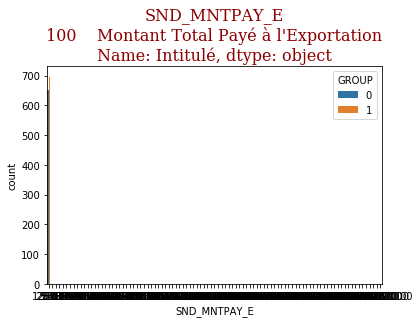


Pour la colonne : SND_MNTAIR_E     0
0  NaN
1  0.0


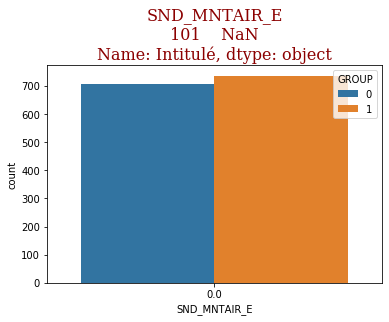

In [234]:
df = df_clean.copy()
for columns in columns_groups:
    column_displayed = columns
    print(column_displayed)
    for col in column_displayed :
        print(f'\nPour la colonne : {col}{pd.DataFrame(df[col].unique())}')
        sns.countplot(data=df, x=col, hue='GROUP')
        plt.title((col + "\n" + str(df_nans[df_nans['key_0']==col]['Intitulé'])), fontdict=_fontdict)
        plt.show()
del column_displayed; del columns; del df

#### <a id='2-2-4'><center><font color="green">2-2-4) Valeurs aberrantes</font></center></a>

#### <a id='2-2-5'><center><font color="green">2-2-5) Valeurs atypiques</font></center></a>

## <a id='3'><center><font color="INDIANRED">3) Visualiser les données</font></center></a>

## <a id='4'><center><font color="INDIANRED">4) Nettoyer les données</font></center></a>

## <a id='5'><center><font color="INDIANRED">5) Equilibrer les données</font></center></a>

## <a id='6'><center><font color="INDIANRED">6) Identifier la problématique (classification)</font></center></a>

## <a id='7'><center><font color="INDIANRED">7) Appliquer des modèles</font></center></a>

## <a id='8'><center><font color="INDIANRED">8) Trouver le modèle plus pertinent</font></center></a>

## Variables importantes et peu présentés:
- SND_MNTPRD_E :  	Montant Produit Exporté
- FAC_MFODEC_F : 	Montant taxe FODEC sur factures émises en susp.

### <a id='8-1'><center><font color="steelblue">8-1) Train_test_split</font></center></a>

### <a id='8-2'><center><font color="steelblue">8-2) Validation Set</font></center></a>

### <a id='8-3'><center><font color="steelblue">8-3) Cross Validation</font></center></a>

### <a id='8-4'><center><font color="steelblue">8-4) Validation Curve</font></center></a>

### <a id='8-5'><center><font color="steelblue">8-5) GridSearchCV</font></center></a>

### <a id='8-6'><center><font color="steelblue">8-6) Learning Curve</font></center></a>

## <a id='9'><center><font color="INDIANRED">9) Analyser le résultat</font></center></a>

# Code